# 3주차 과제 : 결측값 있는 따릉이 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

/Users/kimminji/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# seaborn의 다른 라이브러리
#import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

* EDA의 목적
    - 데이터 분석가
        - 데이터에서 유의미한 정보를 얻어 시각화를 통해 쉽게 설명
        - 축, 라벨 등을 한국어로 / plot을 예쁘게
    - 데이터 사이언티스트
        - 모델 예측의 성능을 향상
        - 파생변수, 이상한 변수 or 값 제거
        
* 인사이트 도출
* 변수 
    - Funchtioning Day 규칙
    - 이슬점 습도와 온도에 의해 결정
    - 즉, 도메인 공부 후 분석에 사용하기
* 날짜형 변환
* 0이 너무 많으면 결측치일 가능성도 있다

In [3]:
bike = pd.read_csv('/Users/kimminji/Downloads/SeoulBikeData_NaN.csv')
df=bike.copy()

Date 날짜 : object

Rented Bike Count 자전거 대여량 : Numeric

Hour 시간 : Numeric

Temperature 기온 : Numeric

Humidity 습도 : Numeric

Wind speed 풍량 : Numeric

Dew point temperature 이슬점 : Numeric

Visibility 시야거리 : Numeric

Solar Radiation 자외선 : Numeric

Rainfall 강우량 : Numeric

Snowfall 강설량 : Numeric

Seasons 계절 : Spring, Summer, Autumn, Winter

Holiday 휴일 유무 : Holiday or No Holiday

Funtional day : Yes or No

* 종속변수:  Rented Bike Count
* 시간 : Hour
* 날씨 관련 : Temperature,Humidity,Wind speed,Dew point temperature,Visibility,Rainfall,Snowfall
* 계절별 : Seasons (이것도 날씨랑 관련있긴 함).Date 
* 휴무 유무 : Holiday, Funtional day

In [4]:
df.head()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.rename(columns={'Temperature(°C)': 'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind speed'
                   ,'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew point temperature','Solar Radiation (MJ/m2)':'Solar Radiation'
                  ,'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'}, inplace=True)

In [6]:
#Unnamed;0 필요없음
df = df.drop('Unnamed: 0',axis = 1)
#df = df.loc[:, ~df.columns.str.contains('^Unnamed: 0')]

In [7]:
df.info()
# object으로 들어가 있는 Date를 Datetime으로 바꾸는게 좋음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            7884 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             7884 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                7884 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
print(df['Date'].describe()) # 도대체 뭐가 문제니??

count                    8760
unique                    365
top       2017-12-01 00:00:00
freq                       24
first     2017-12-01 00:00:00
last      2018-11-30 00:00:00
Name: Date, dtype: object


In [9]:
df.head()
df.info()

df2 = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            7884 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             7884 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                7884 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

<AxesSubplot:>

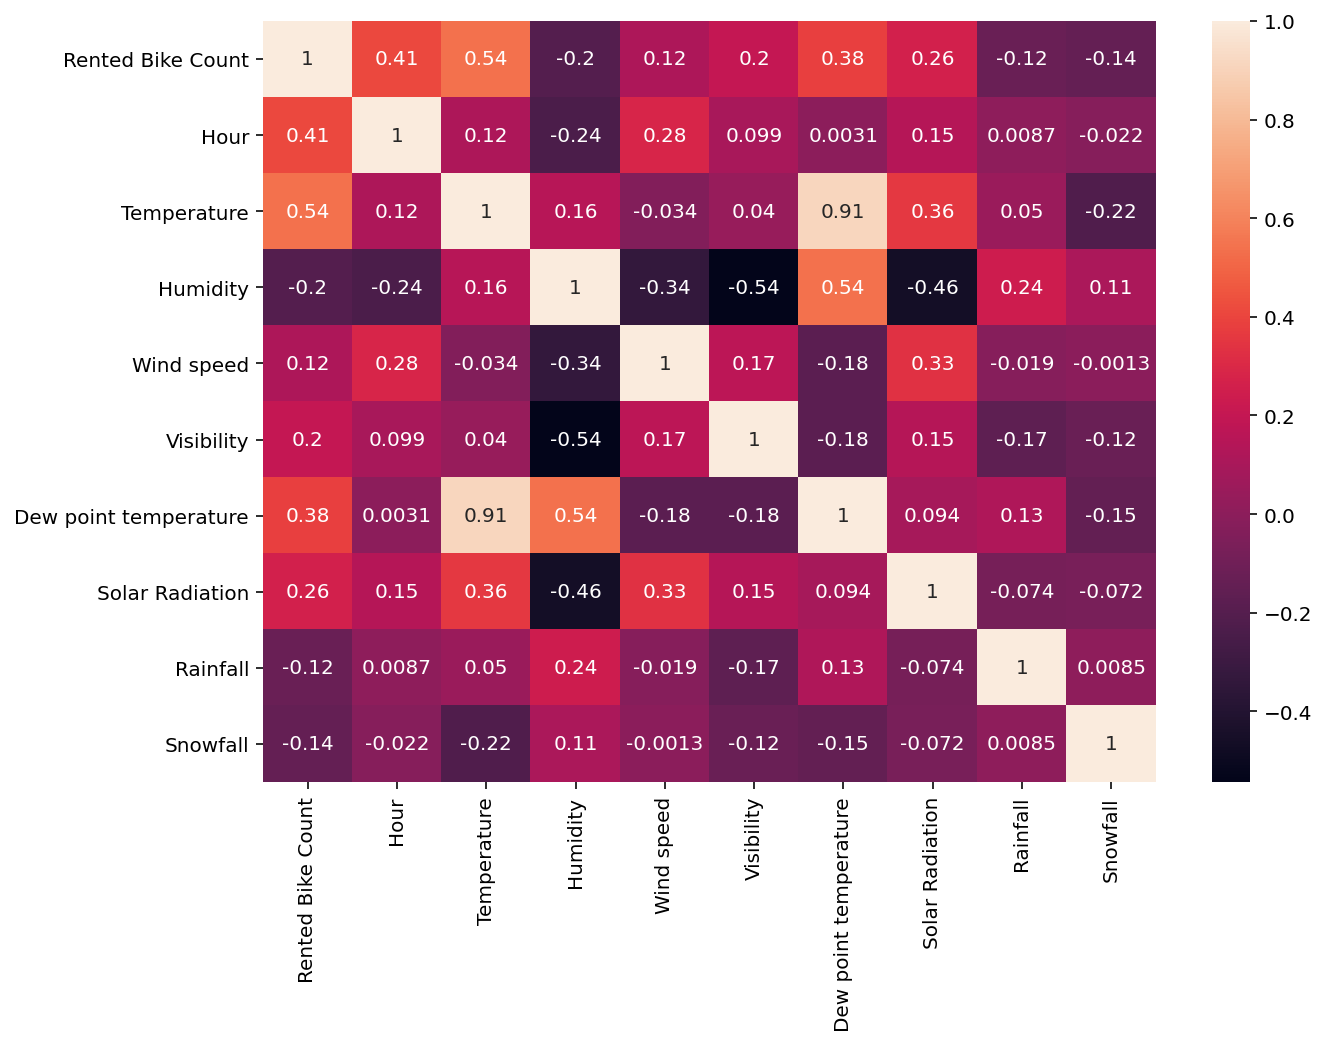

In [10]:
plt.figure(figsize=(10,7)) 
sns.heatmap(df.corr(),annot = True)

## EDA

### 종속변수 Rented Bike Count

In [11]:
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

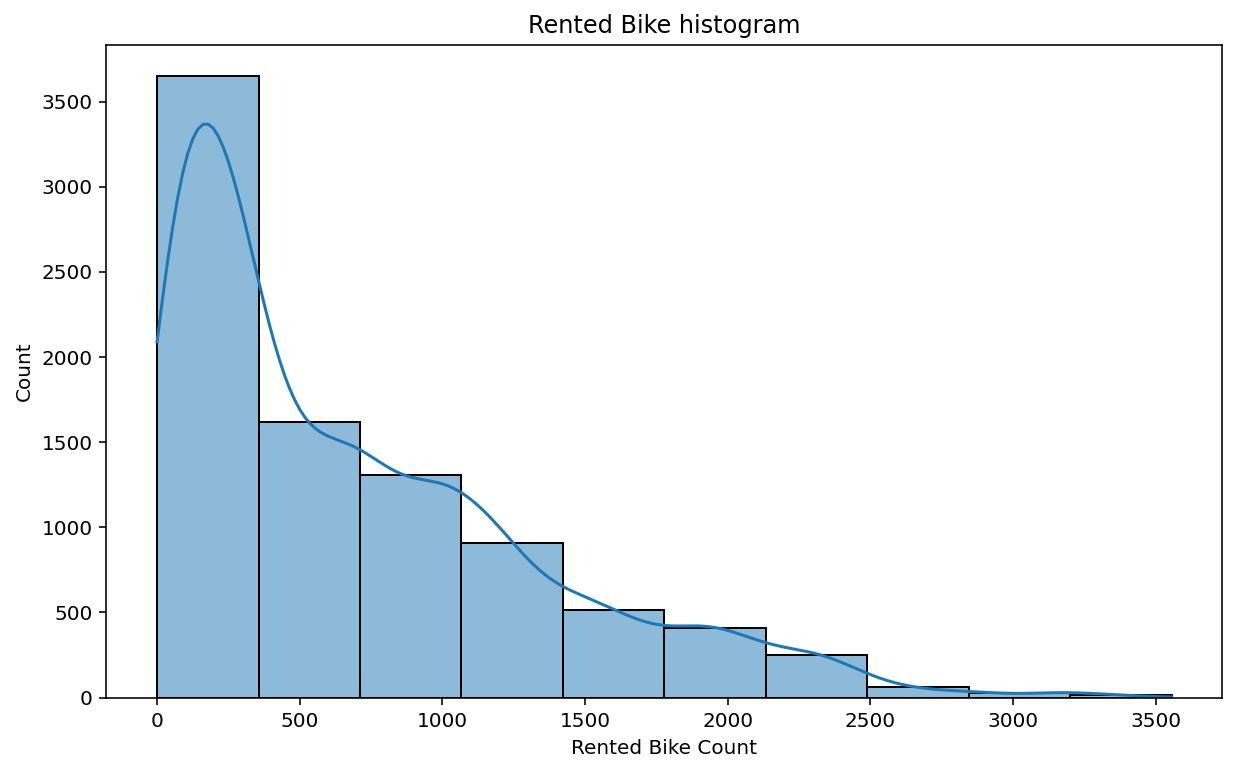

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], bins=10, kde=True) 
plt.title('Rented Bike histogram',fontsize=12)
plt.show()

## Hour

Hour 시간 : Numeric

시간에 따른 자전거 대여량

18시 ~ 21시 / 8시 자전거 대여량 많음 

-> 퇴근 시간 이후 그리고 출근시간 유동인구가 많은 시간대

In [13]:
df['Hour'].describe() #0부터 23

count    8760.000000
mean       11.500000
std         6.922582
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64

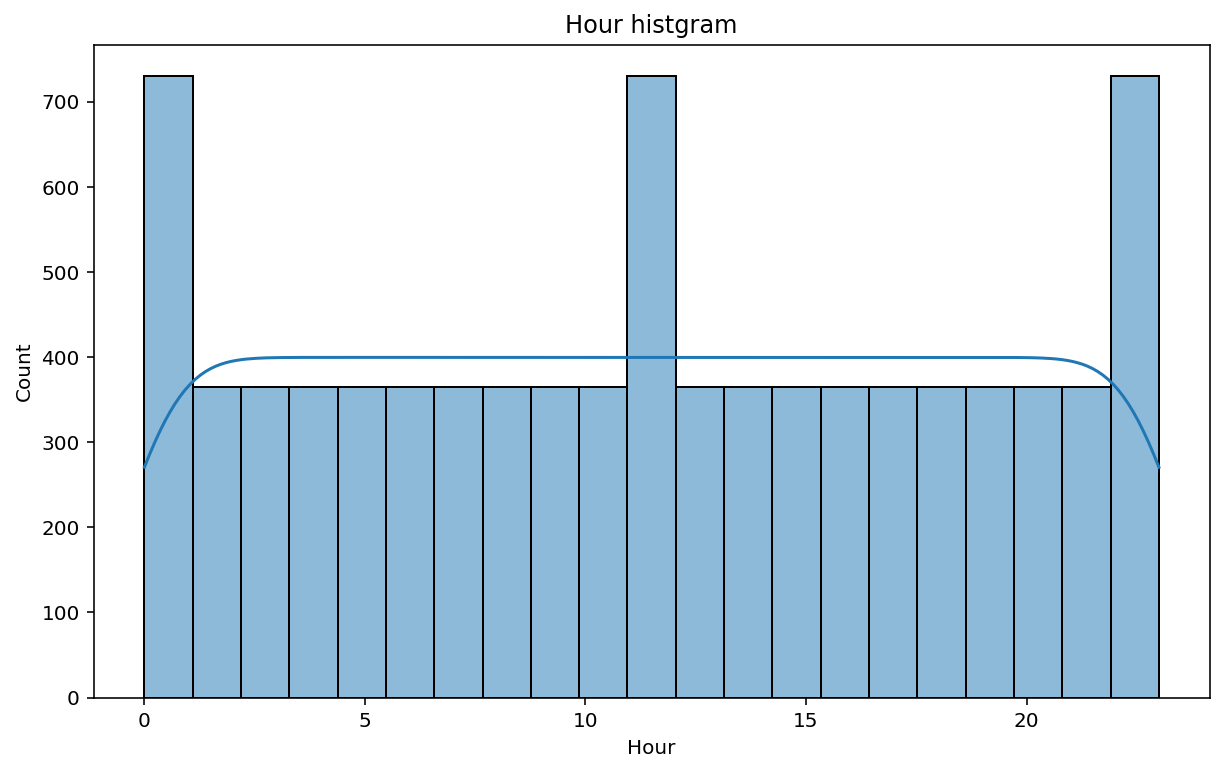

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], kde=True) 
plt.title('Hour histgram',fontsize=12)
plt.show()
# ?? 이 그래프는 뭘 나타내는 걸까

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

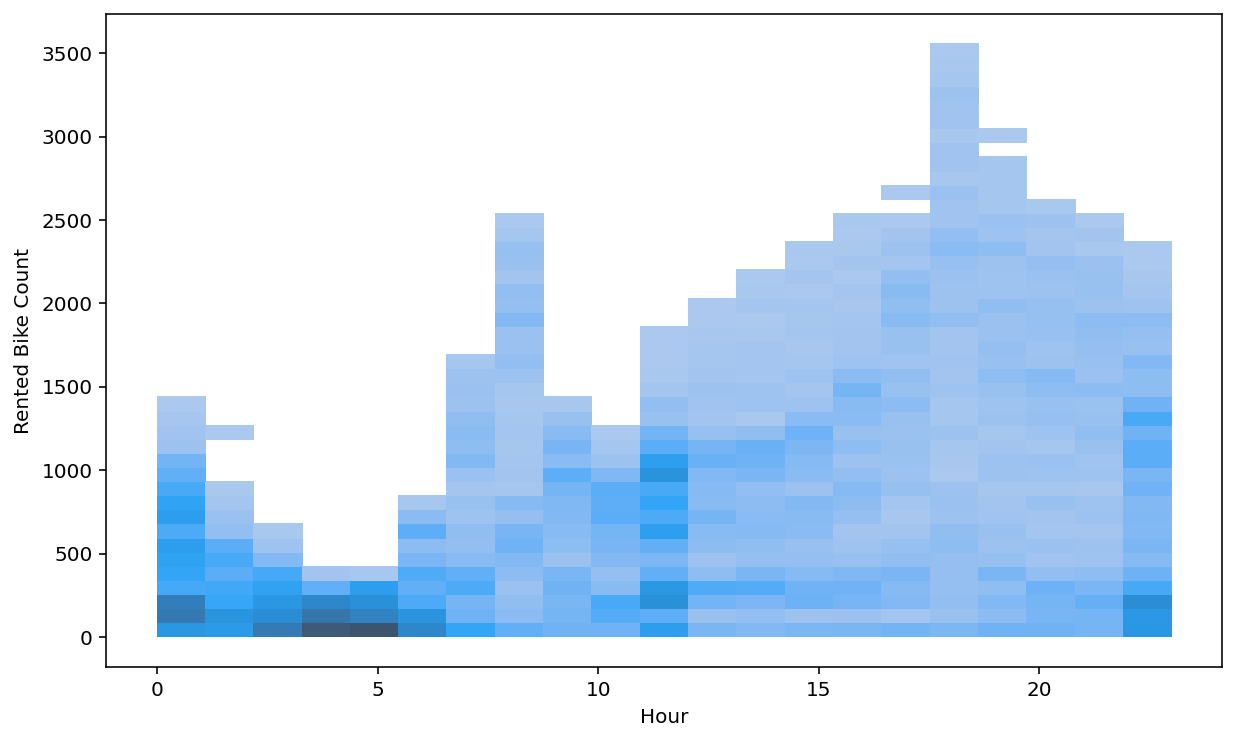

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'Hour',y = 'Rented Bike Count',data = df)

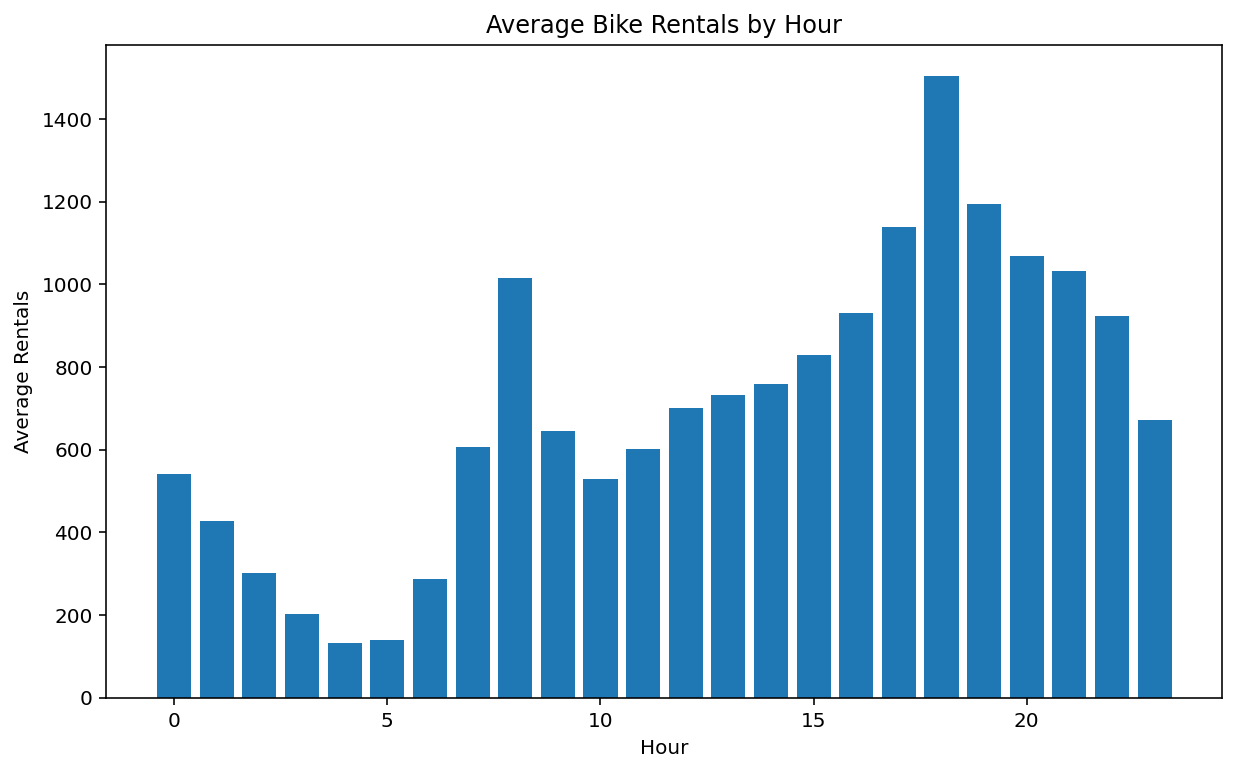

In [16]:
# 'Hour'별로 바이크 대여량의 평균 계산
hourly_rentals_mean = df.groupby('Hour')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(hourly_rentals_mean.index, hourly_rentals_mean.values)
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.show()

In [17]:
hourly_rentals_mean.tail(10)

Hour
14     758.824658
15     829.186301
22     922.797260
16     930.621918
8     1015.701370
21    1031.449315
20    1068.964384
17    1138.509589
19    1195.147945
18    1502.926027
Name: Rented Bike Count, dtype: float64

## Temperature

날씨가 따뜻할수록 대여량이 증가한다

약 24도에서 32도 사이에 대여량이 많다

In [18]:
df['Temperature'].describe()

count    7884.000000
mean       13.026370
std        11.936017
min       -17.800000
25%         3.600000
50%        13.950000
75%        22.600000
max        39.400000
Name: Temperature, dtype: float64

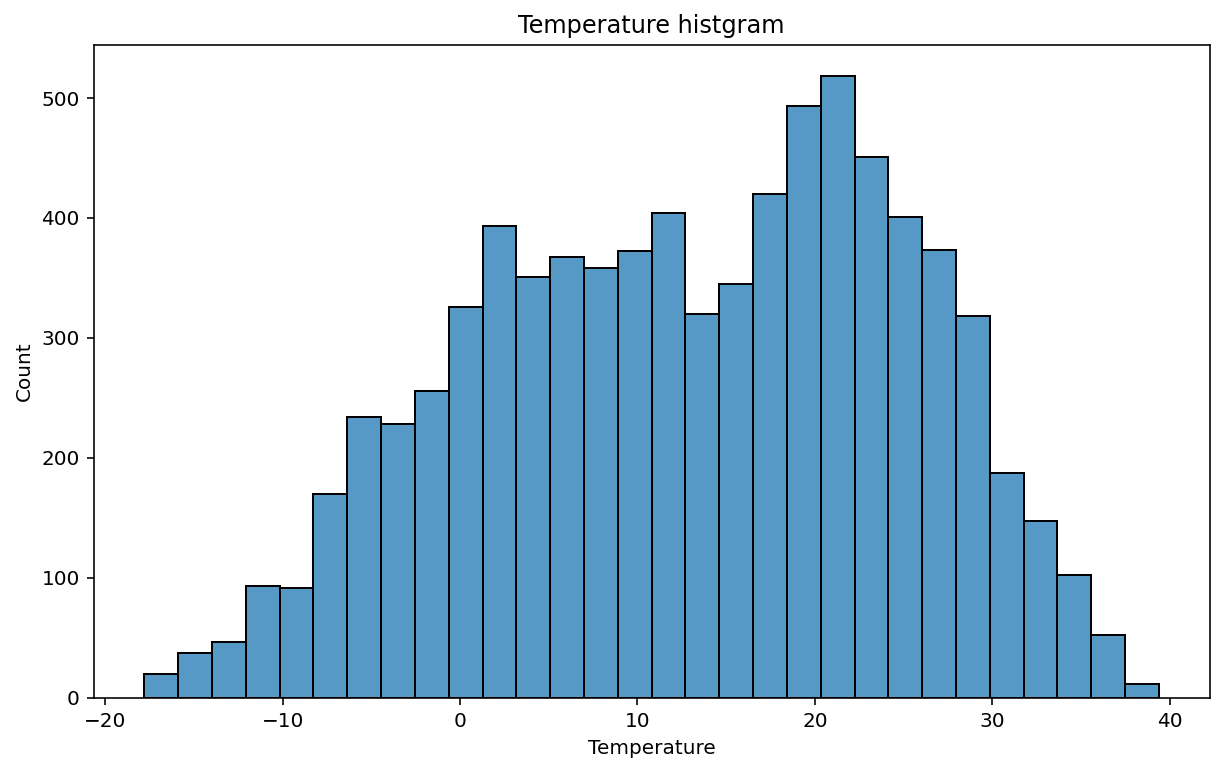

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'])
plt.title('Temperature histgram',fontsize=12)
plt.show()

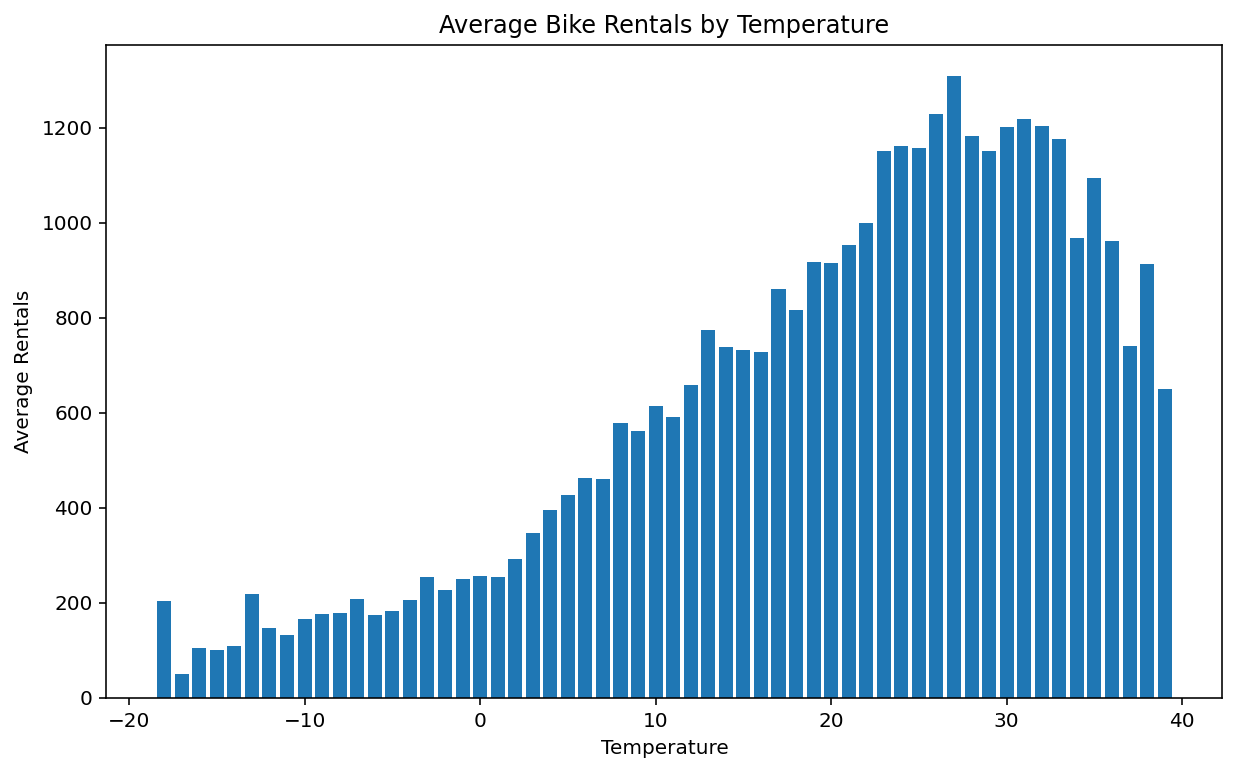

In [20]:
# 'Temperature'별로 바이크 대여량의 평균 계산

df['Rounded Temperature'] = np.round(df['Temperature'])
tem_rentals_mean = df.groupby('Rounded Temperature')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(tem_rentals_mean.index, tem_rentals_mean.values)
plt.title('Average Bike Rentals by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Rentals')
plt.show()

In [21]:
tem_rentals_mean.tail(10)

Rounded Temperature
29.0    1150.865248
25.0    1157.188119
24.0    1162.141221
33.0    1177.058824
28.0    1181.991453
30.0    1201.857143
32.0    1202.958333
31.0    1217.666667
26.0    1229.712766
27.0    1307.954802
Name: Rented Bike Count, dtype: float64

## Humidity / Dew point temperature / Temperature

이슬점  : 대기 속 수증기가 포화되어 그 수중기의 일부가 물로 응결할 때의 온도를 뜻한다.

이슬점은 온도와 습도에 따라 변화 

-> 이슬점이 높을 수록 자전거 대여량이 증가한다

습도 :  습도로 뭘 알 수 있을까?

-> 습도 0%는 거의 불가능

In [22]:
df['Humidity'].describe()

count    8760.000000
mean       58.226256
std        20.362413
min         0.000000
25%        42.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity, dtype: float64

In [23]:
df['Dew point temperature'].describe()

count    8760.000000
mean        4.073813
std        13.060369
min       -30.600000
25%        -4.700000
50%         5.100000
75%        14.800000
max        27.200000
Name: Dew point temperature, dtype: float64

Text(0.5, 1.0, 'Dew Point Temperature Distribution')

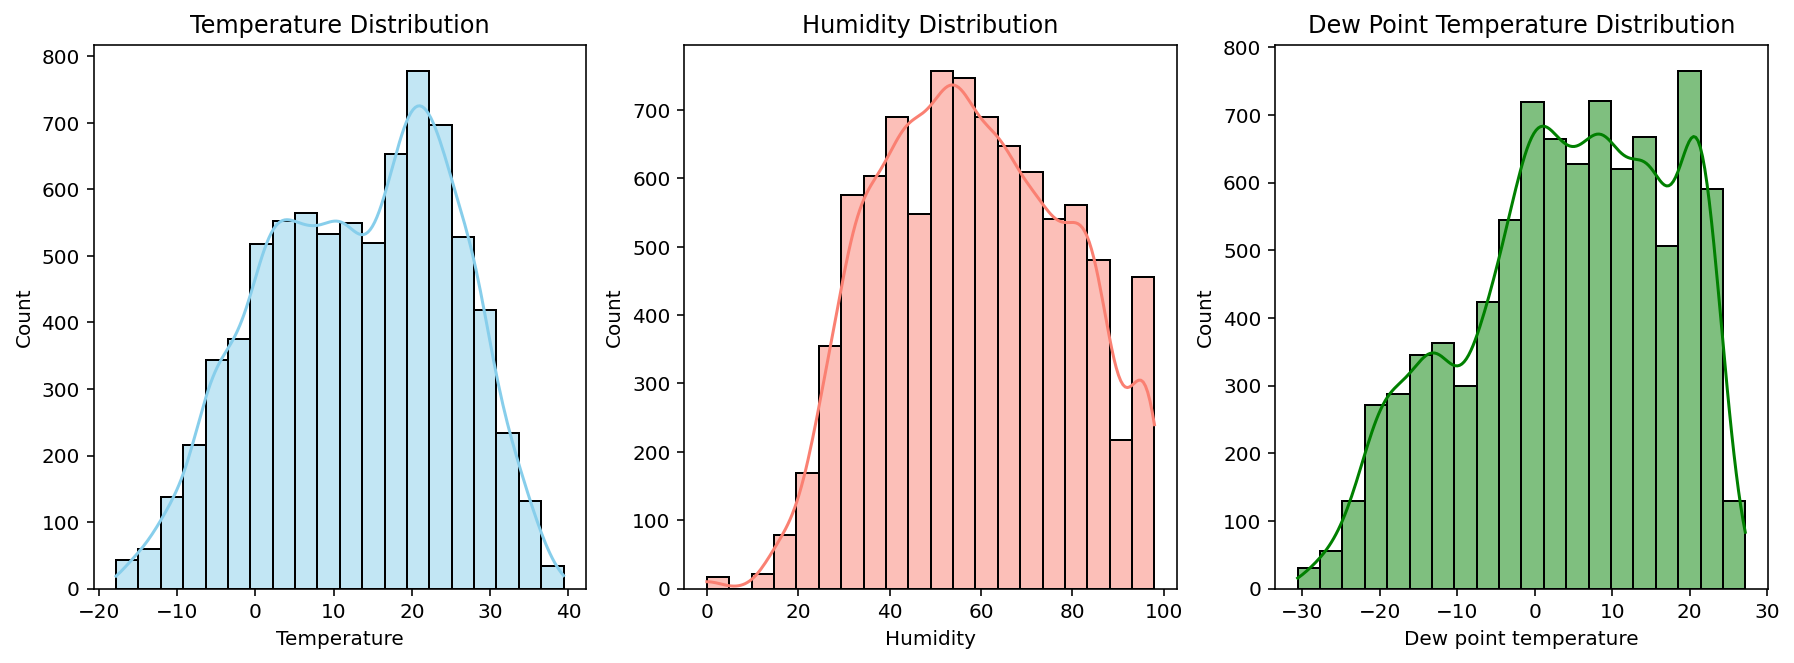

In [24]:
# 변수들의 분포 분석
plt.figure(figsize=(15, 5))

# Temperature의 분포
plt.subplot(1, 3, 1)
sns.histplot(df['Temperature'], bins=20, color='skyblue', kde=True)
plt.title('Temperature Distribution')

# Humidity의 분포
plt.subplot(1, 3, 2)
sns.histplot(df['Humidity'], bins=20, color='salmon', kde=True)
plt.title('Humidity Distribution')

# Dew point temperature의 분포
plt.subplot(1, 3, 3)
sns.histplot(df['Dew point temperature'], bins=20, color='green', kde=True)
plt.title('Dew Point Temperature Distribution')


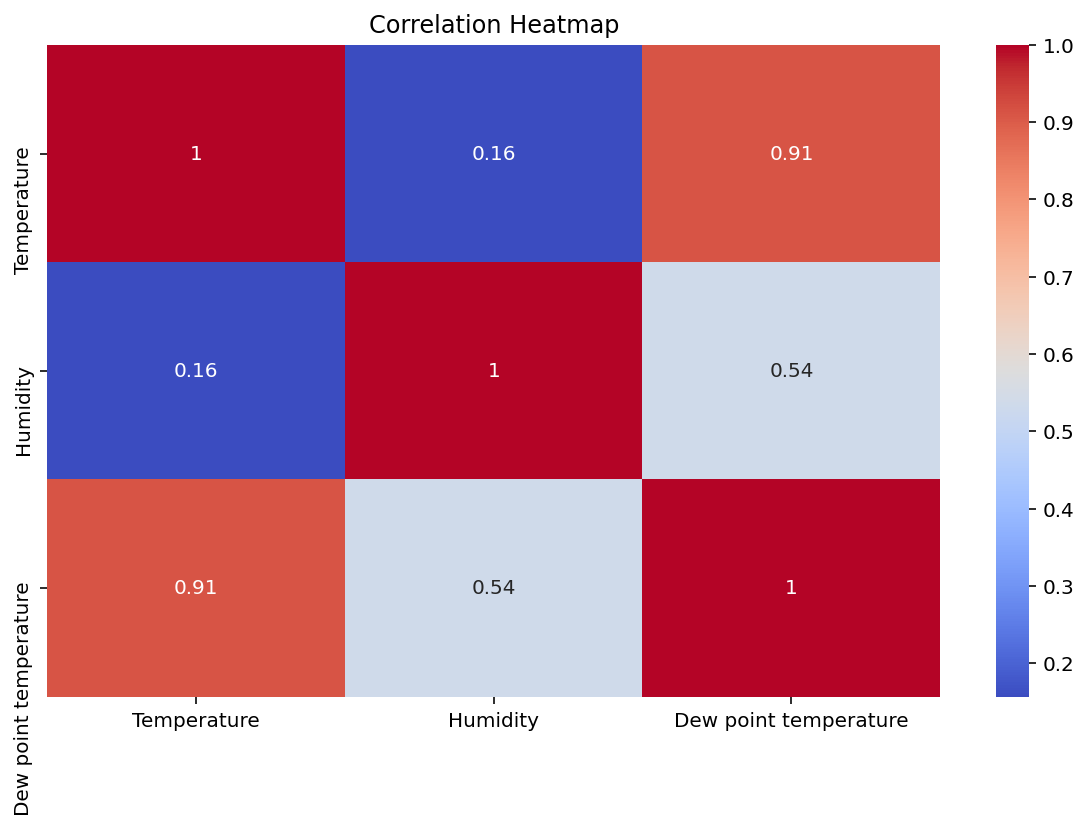

In [25]:
# 변수들 간의 상관관계 분석
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Temperature', 'Humidity', 'Dew point temperature']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 이슬점은 온도와 강한 상관관계 습도와 약한 상관관계가 있다

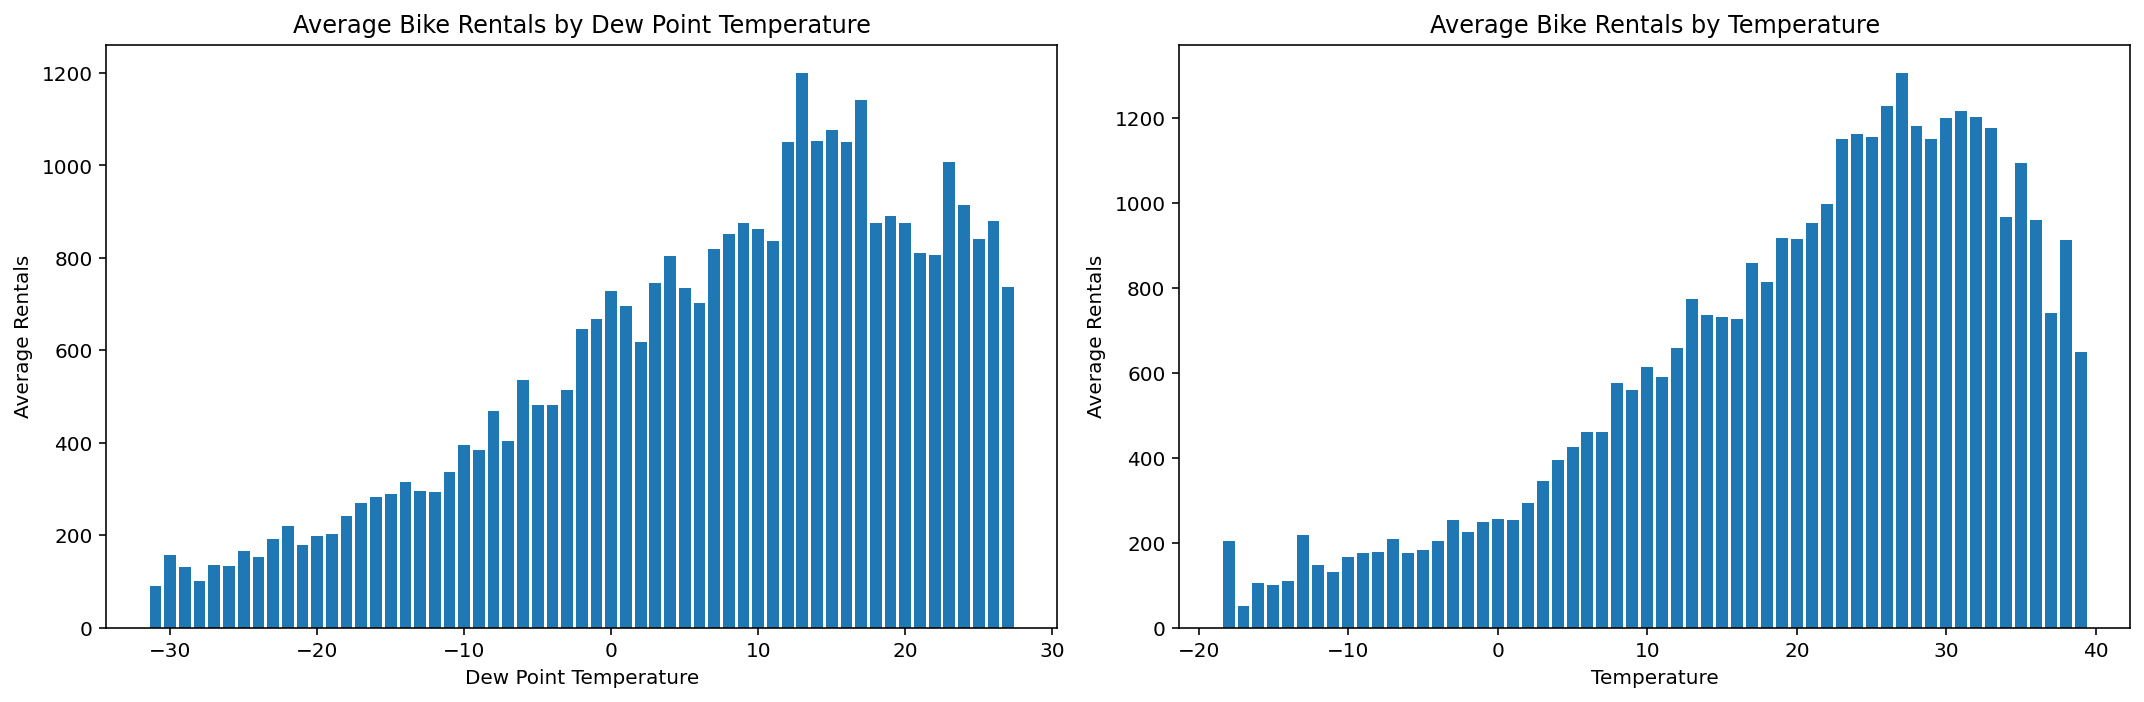

In [26]:
# 이슬점 별 자전거 대여량의 평균 계산
df['Rounded Dewpoint'] = np.round(df['Dew point temperature'])
dewpoint_rentals_mean = df.groupby('Rounded Dewpoint')['Rented Bike Count'].mean()

plt.figure(figsize=(15, 5))

# 이슬점 별 자전거 대여량 그래프 그리기
plt.subplot(1, 2, 1)
plt.bar(dewpoint_rentals_mean.index, dewpoint_rentals_mean.values)
plt.title('Average Bike Rentals by Dew Point Temperature')
plt.xlabel('Dew Point Temperature')
plt.ylabel('Average Rentals')
plt.tight_layout()


# 온도 별 자전거 대여량 그래프 그리기
plt.subplot(1, 2, 2)
plt.bar(tem_rentals_mean.index, tem_rentals_mean.values)
plt.title('Average Bike Rentals by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Rentals')

plt.tight_layout()  # 그래프 간의 간격 조정
plt.show()

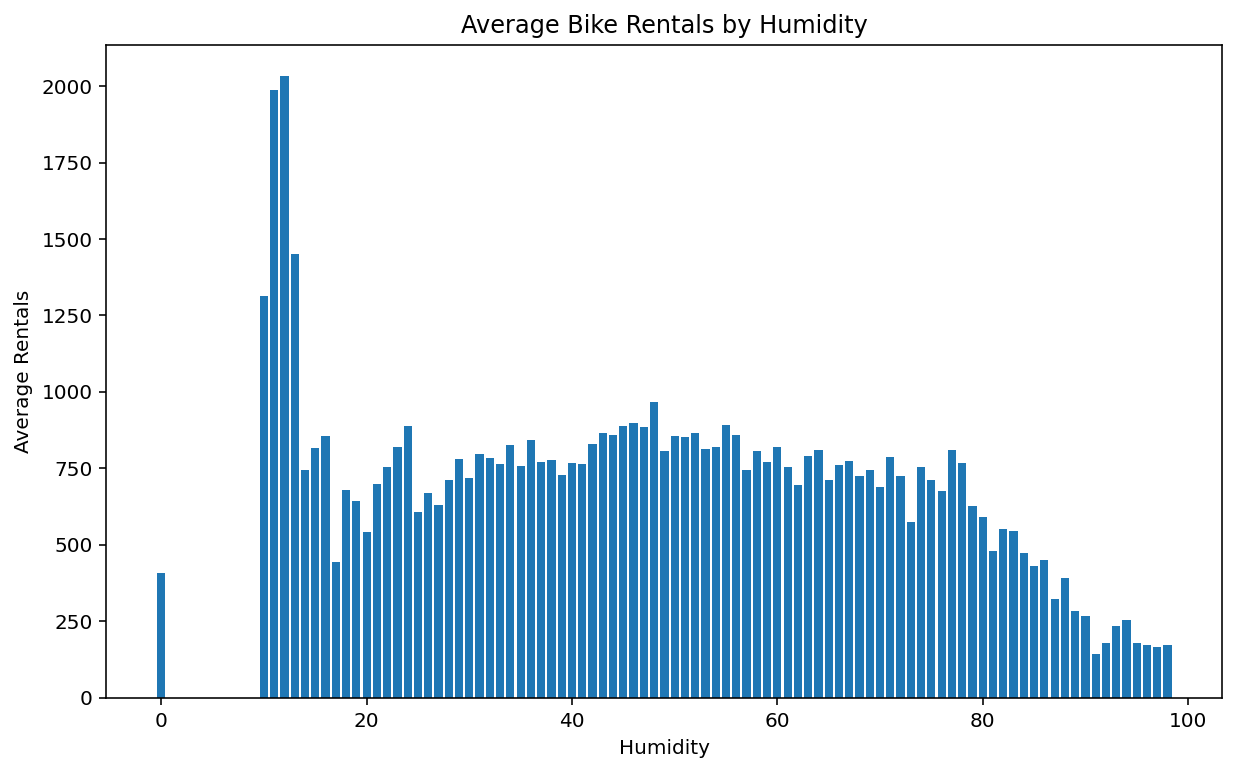

In [27]:
# 'Humidity'별로 바이크 대여량의 평균 계산

hum_rentals_mean = df.groupby('Humidity')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(hum_rentals_mean.index, hum_rentals_mean.values)
plt.title('Average Bike Rentals by Humidity')
plt.xlabel('Humidity')
plt.ylabel('Average Rentals')
plt.show()

## Wind Speed

In [28]:
df['Wind speed'].describe()

count    7884.000000
mean        1.727220
std         1.036138
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: Wind speed, dtype: float64

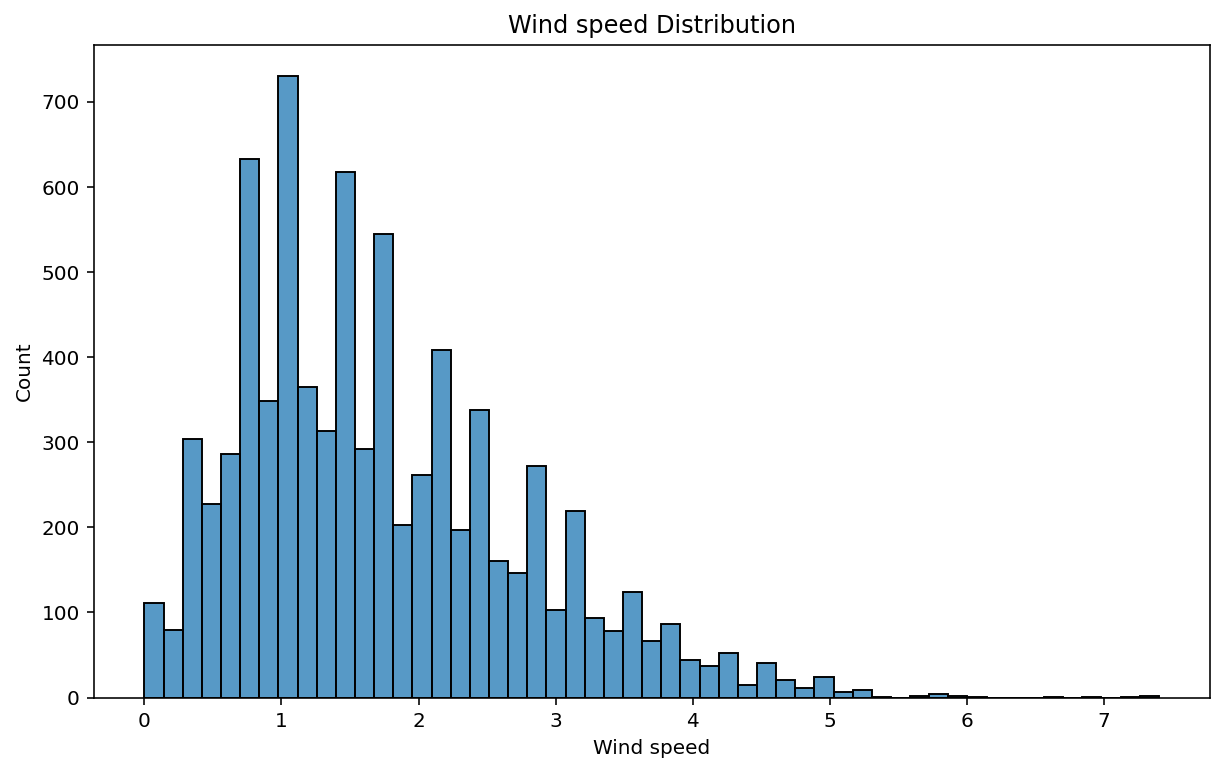

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Wind speed'])
plt.title('Wind speed Distribution',fontsize=12)
plt.show()

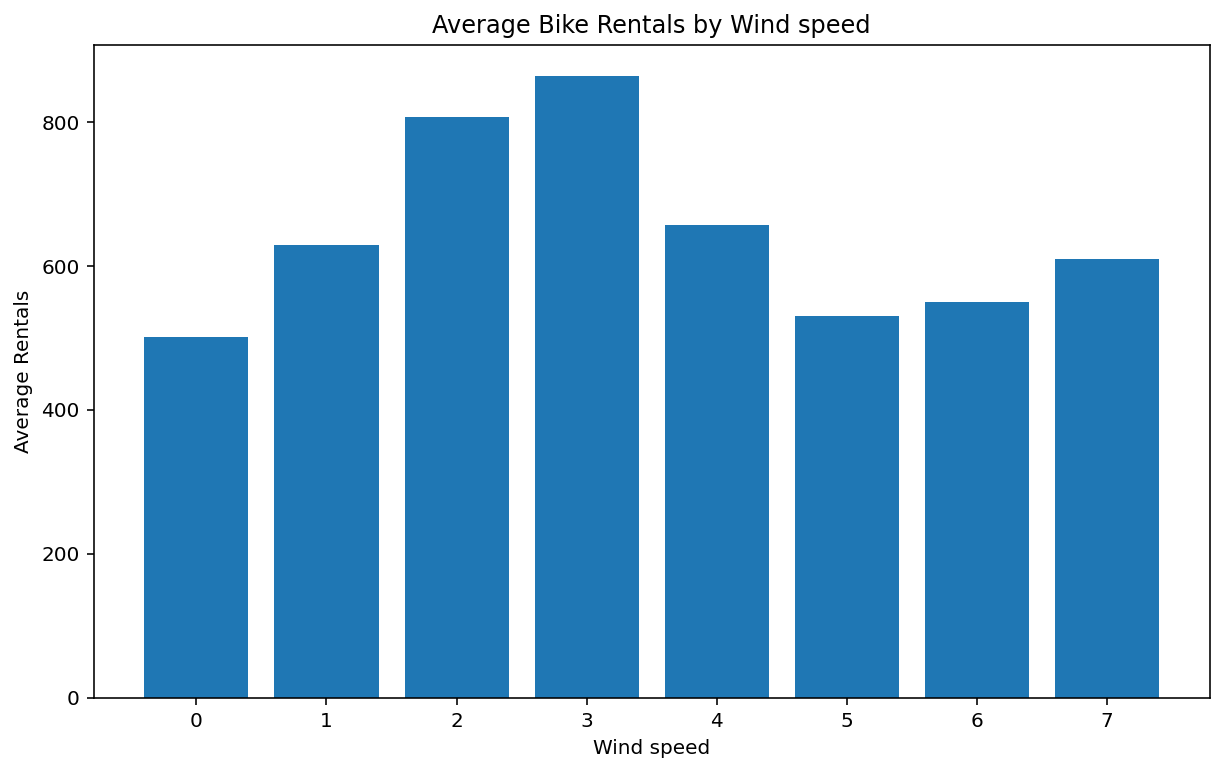

In [30]:
# 'Wind speed'별로 바이크 대여량의 평균 계산
df['Rounded Wind speed'] = np.round(df['Wind speed'])
wind_rentals_mean = df.groupby('Rounded Wind speed')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(wind_rentals_mean.index, wind_rentals_mean.values)
plt.title('Average Bike Rentals by Wind speed')
plt.xlabel('Wind speed')
plt.ylabel('Average Rentals')
plt.show()

## Visibility 

 대기 중의 물체가 얼마나 멀리 볼 수 있는지를 나타내는 지표입니다. 주로 대기 중의 먼지, 연기, 안개 등으로 인해 물체가 가리여 보이는 정도를 측정하는 데 사용됩니다. 

In [31]:
df['Visibility'].describe()

count    8760.000000
mean     1436.825799
std       608.298712
min        27.000000
25%       940.000000
50%      1698.000000
75%      2000.000000
max      2000.000000
Name: Visibility, dtype: float64

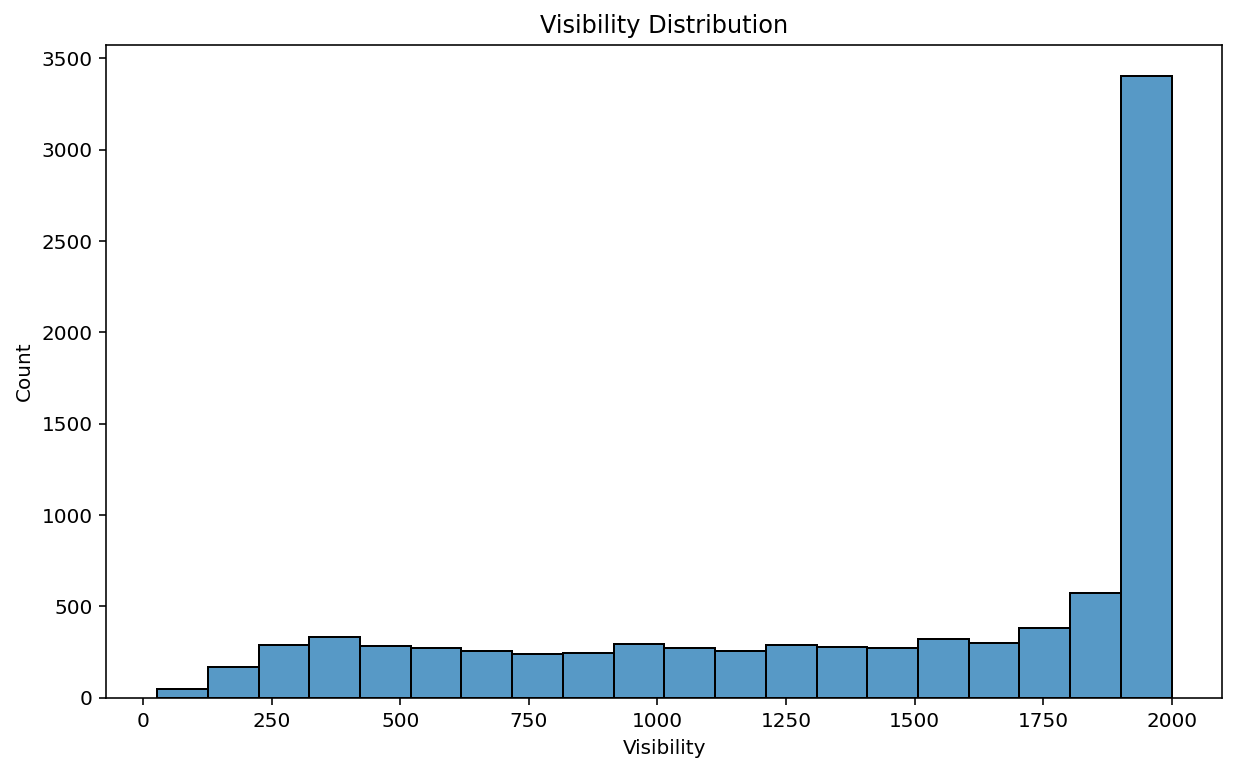

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Visibility'])
plt.title('Visibility Distribution',fontsize=12)
plt.show()

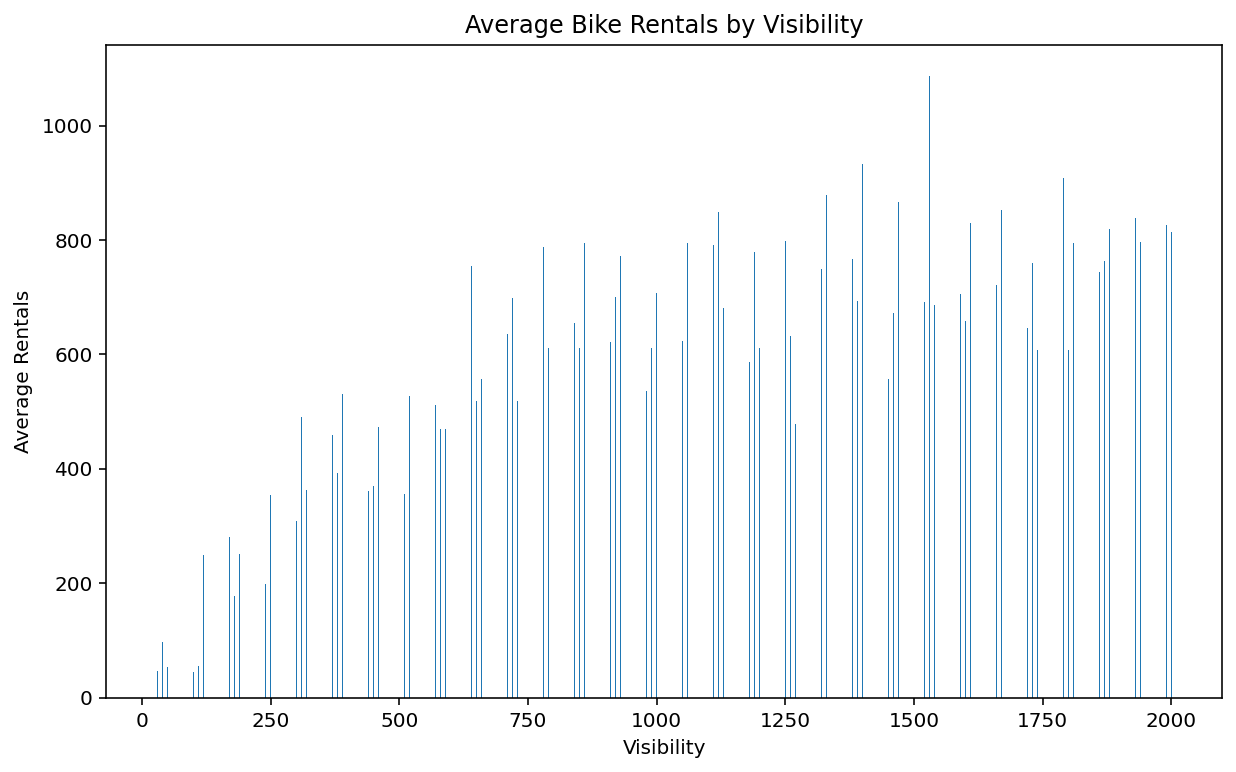

In [33]:
# 'Visibility'별로 바이크 대여량의 평균 계산 -> 다른 방법은 없나..?

df['Rounded Visibility'] = np.round(df['Visibility'],-1)
vis_rentals_mean = df.groupby('Rounded Visibility')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(vis_rentals_mean.index, vis_rentals_mean.values)
plt.title('Average Bike Rentals by Visibility')
plt.xlabel('Visibility')
plt.ylabel('Average Rentals')
plt.show()

## Solar Radiation

태양으로부터 지구에 도달하는 복사 에너지의 양을 나타냅니다. 지구의 기후와 날씨, 그리고 자연 생태계에 영향을 미칩니다. 태양 복사량은 낮과 밤, 계절에 따라 변동하며, 지구의 위치와 대기 상태에 따라 다양한 영향을 줍니다.

In [34]:
df['Solar Radiation'].describe()

count    8760.000000
mean        0.569111
std         0.868746
min         0.000000
25%         0.000000
50%         0.010000
75%         0.930000
max         3.520000
Name: Solar Radiation, dtype: float64

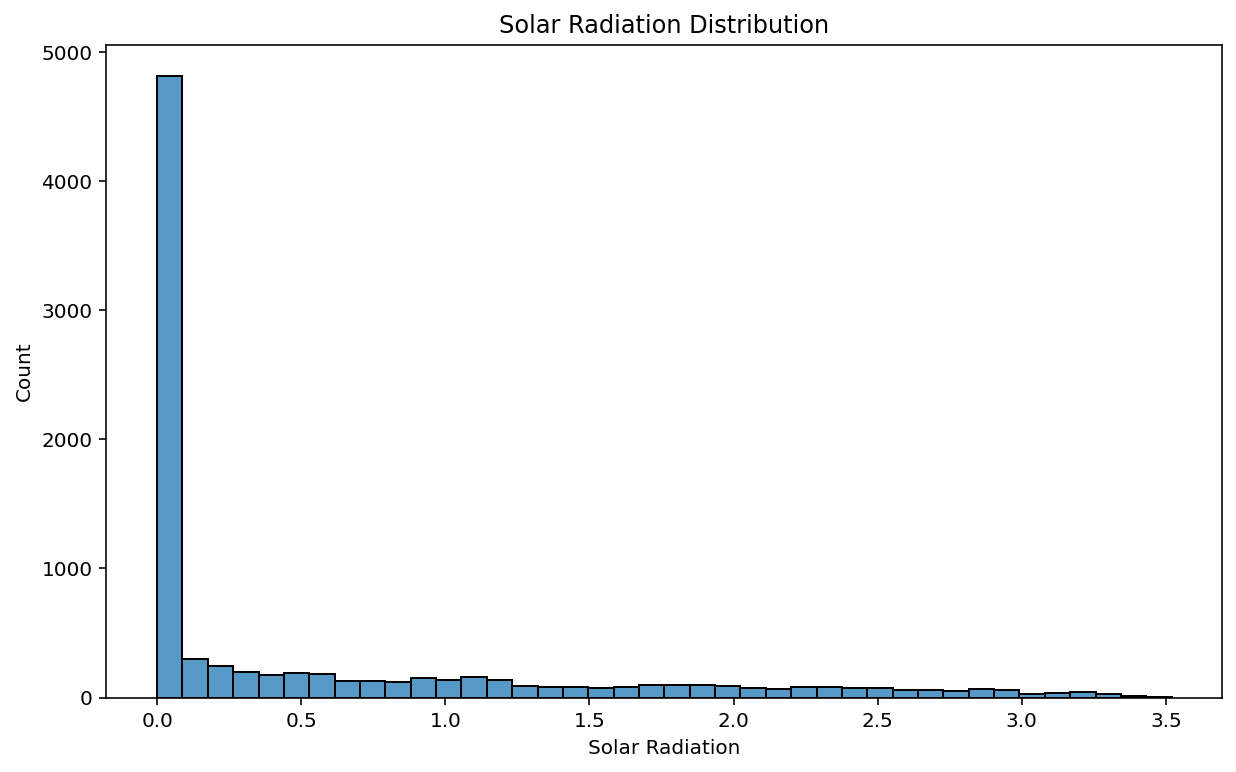

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Solar Radiation'])
plt.title('Solar Radiation Distribution',fontsize=12)
plt.show()

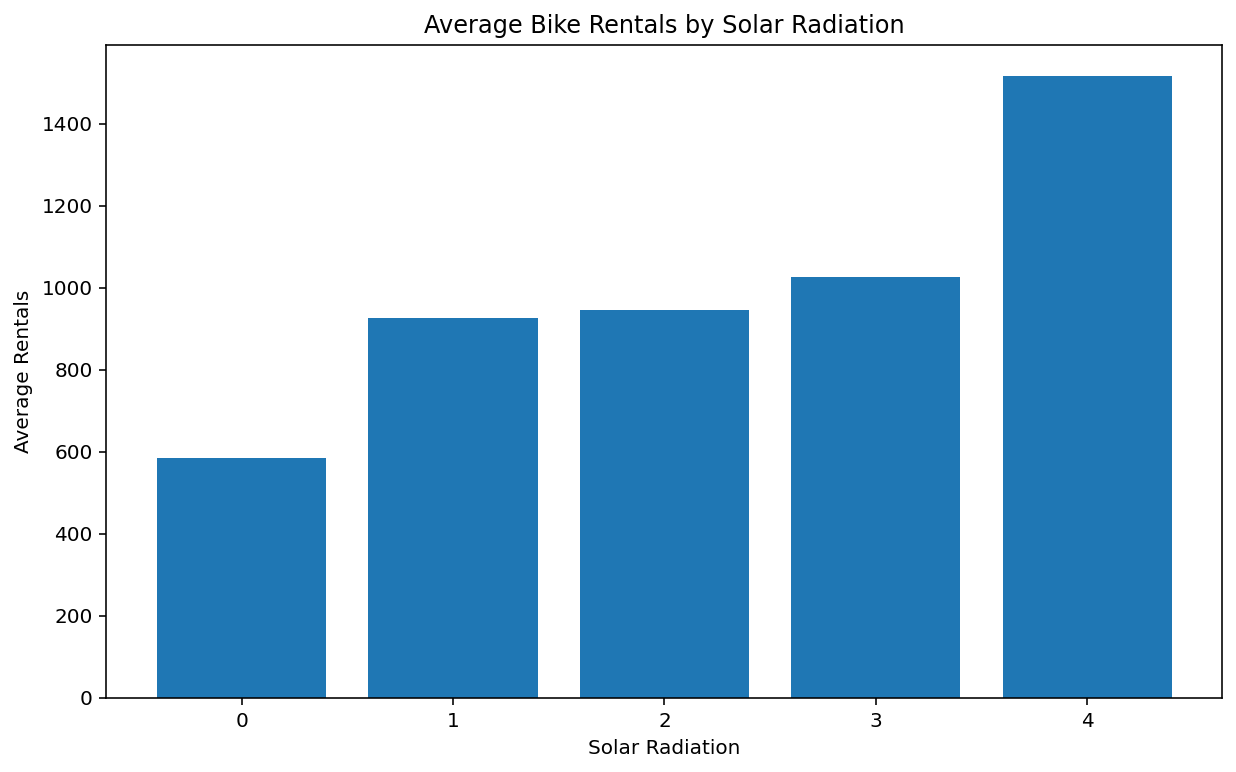

In [36]:
# 'Solar Radiation'별로 바이크 대여량의 평균 계산 

df['Rounded Solar Radiation'] = np.round(df['Solar Radiation'])
vis_rentals_mean = df.groupby('Rounded Solar Radiation')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(vis_rentals_mean.index, vis_rentals_mean.values)
plt.title('Average Bike Rentals by Solar Radiation')
plt.xlabel('Solar Radiation')
plt.ylabel('Average Rentals')
plt.show()

## Rainfall / Snowfall

강우량/강설량
:비랑 눈이 많이 오면 자건거 대여량이 줄어든다

In [37]:
print(df['Rainfall'].describe())
print(df['Snowfall'].describe())

count    8760.000000
mean        0.148687
std         1.128193
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall, dtype: float64
count    8760.000000
mean        0.075068
std         0.436746
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall, dtype: float64


Text(0.5, 1.0, 'Snowfall Distribution')

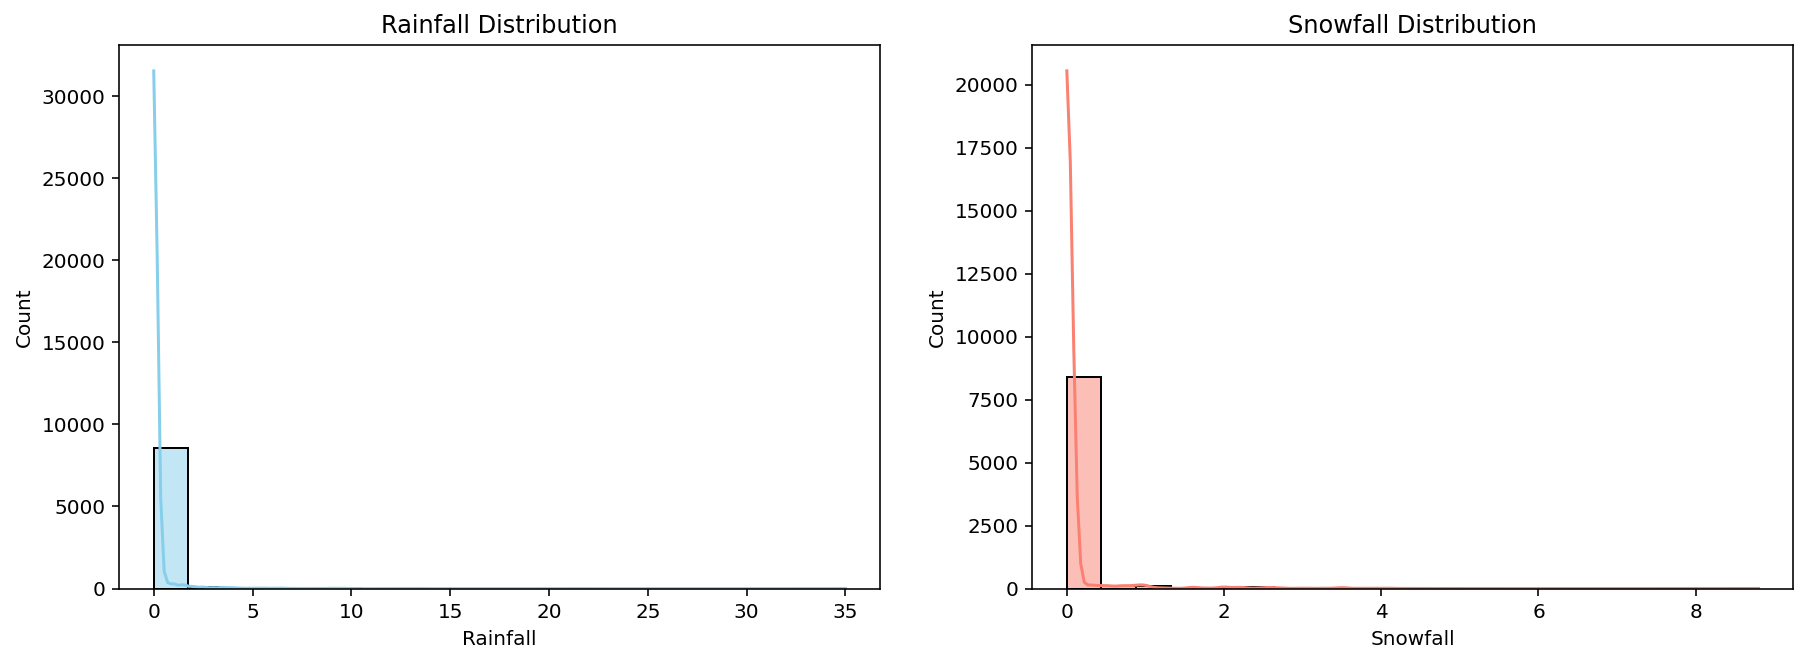

In [38]:
# 변수들의 분포 분석
plt.figure(figsize=(15, 5))

# Temperature의 분포
plt.subplot(1, 2, 1)
sns.histplot(df['Rainfall'], bins=20, color='skyblue', kde=True)
plt.title('Rainfall Distribution')

# Humidity의 분포
plt.subplot(1, 2, 2)
sns.histplot(df['Snowfall'], bins=20, color='salmon', kde=True)
plt.title('Snowfall Distribution')


## Seasons

여름 > 가을 > 봄 > 겨울 순으로 대여량이 많다

In [39]:
df['Seasons'].value_counts()

Spring    1990
Summer    1990
Autumn    1969
Winter    1935
Name: Seasons, dtype: int64

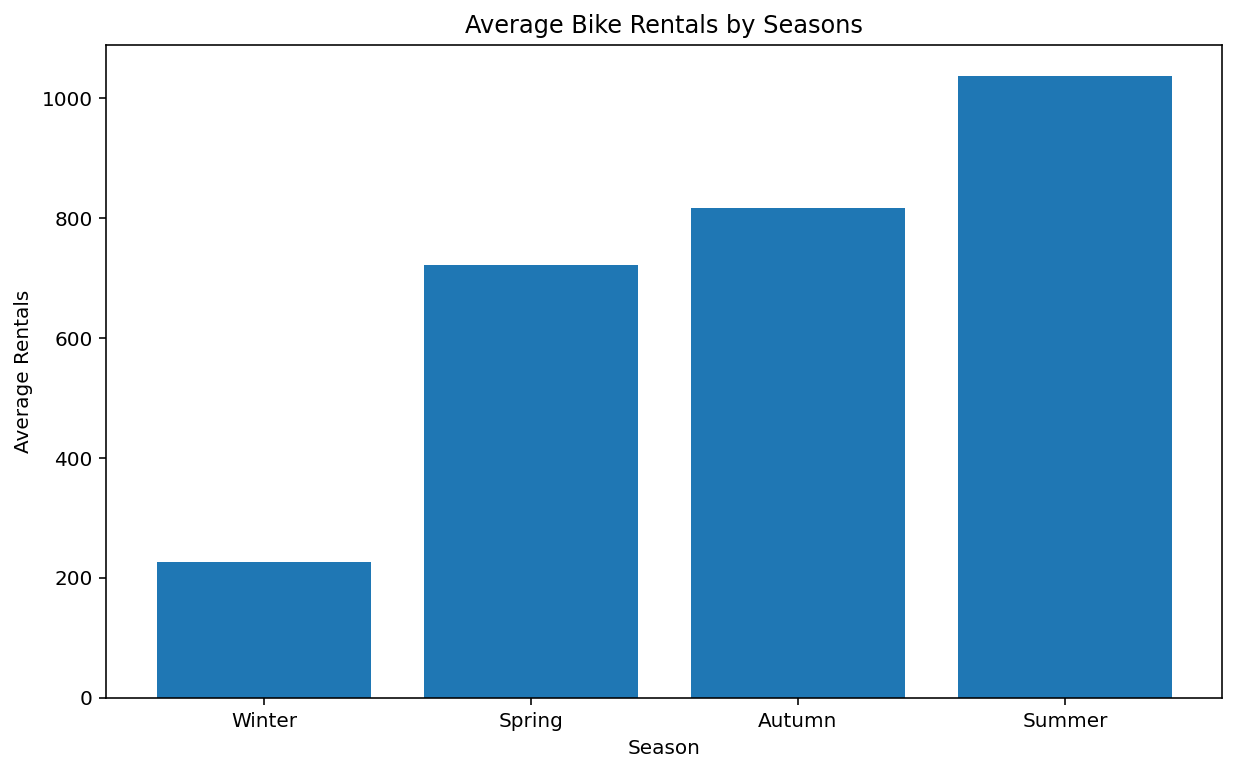

In [40]:
# 'Seasons'별로 바이크 대여량의 평균 계산

sea_rentals_mean = df.groupby('Seasons')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(sea_rentals_mean.index, sea_rentals_mean.values)
plt.title('Average Bike Rentals by Seasons')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.show()

## Holiday / Functioning day

Holiday = 공휴일(크리스마스,설,근로자의 날 등)

-> 공휴일에는 평소보다 자전거 대여량이 작다

Functioning day = 운영을 안 하는 날?

-> Functioning day가 아닐 때는 대여량 0 

In [41]:
print(df['Holiday'].value_counts())
print(df['Functioning Day'].value_counts())

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [42]:
holiday_rows = df[df['Holiday'] == 'Holiday']
holiday_rows['Date'].drop_duplicates()

504    2017-12-22
552    2017-12-24
576    2017-12-25
720    2017-12-31
744    2018-01-01
1824   2018-02-15
1848   2018-02-16
1872   2018-02-17
2160   2018-03-01
3624   2018-05-01
4128   2018-05-22
4488   2018-06-06
6168   2018-08-15
7104   2018-09-23
7128   2018-09-24
7152   2018-09-25
7344   2018-10-03
7488   2018-10-09
Name: Date, dtype: datetime64[ns]

Text(0.5, 1.0, 'Rainfall Distribution')

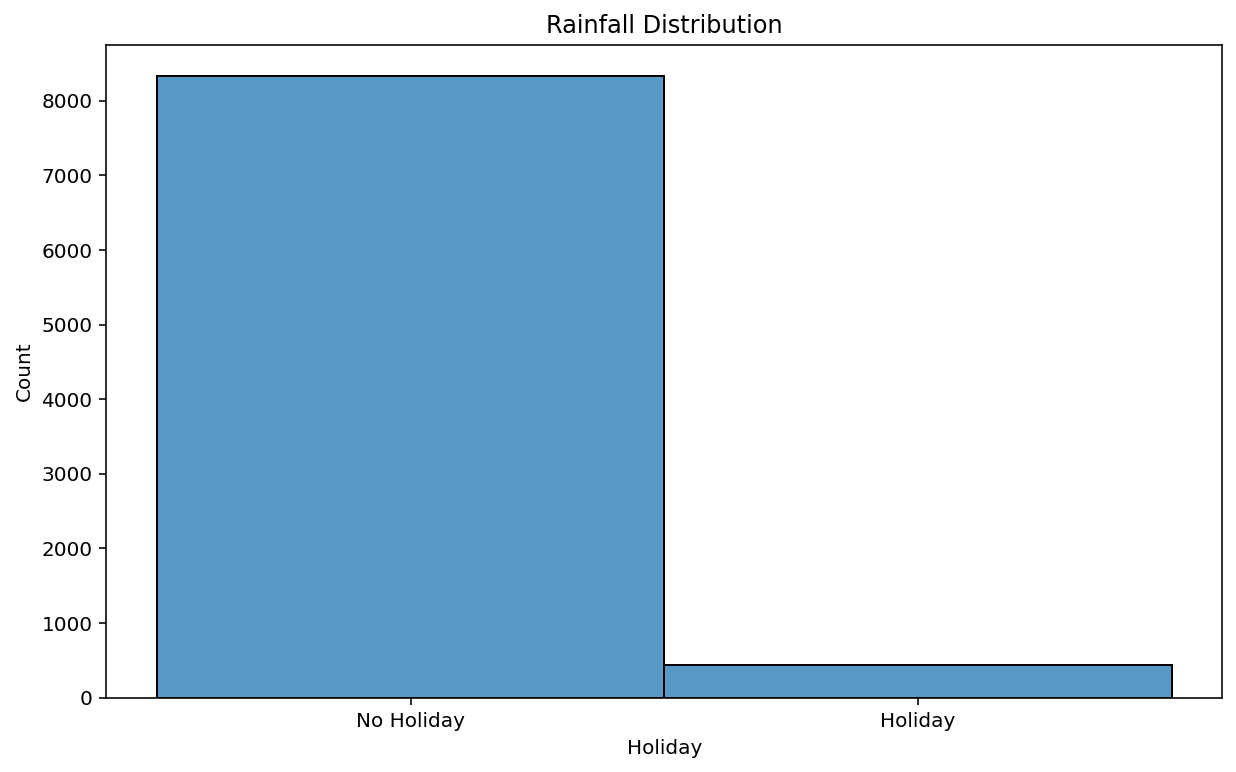

In [43]:
# Holiday의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Holiday'])
plt.title('Rainfall Distribution')

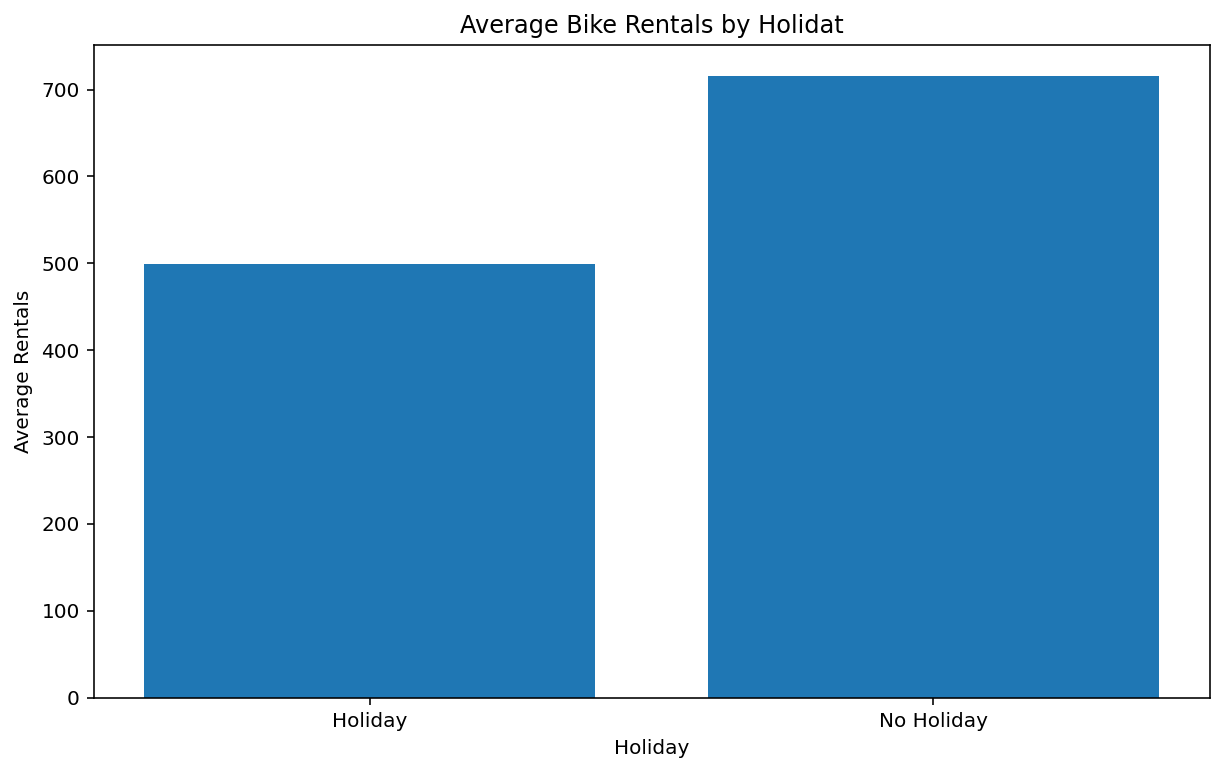

In [44]:
# 'Holiday'별로 바이크 대여량의 평균 계산

hol_rentals_mean = df.groupby('Holiday')['Rented Bike Count'].mean().sort_values()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(hol_rentals_mean.index, hol_rentals_mean.values)
plt.title('Average Bike Rentals by Holidat')
plt.xlabel('Holiday')
plt.ylabel('Average Rentals')
plt.show()

Text(0.5, 1.0, 'Functioning Day Distribution')

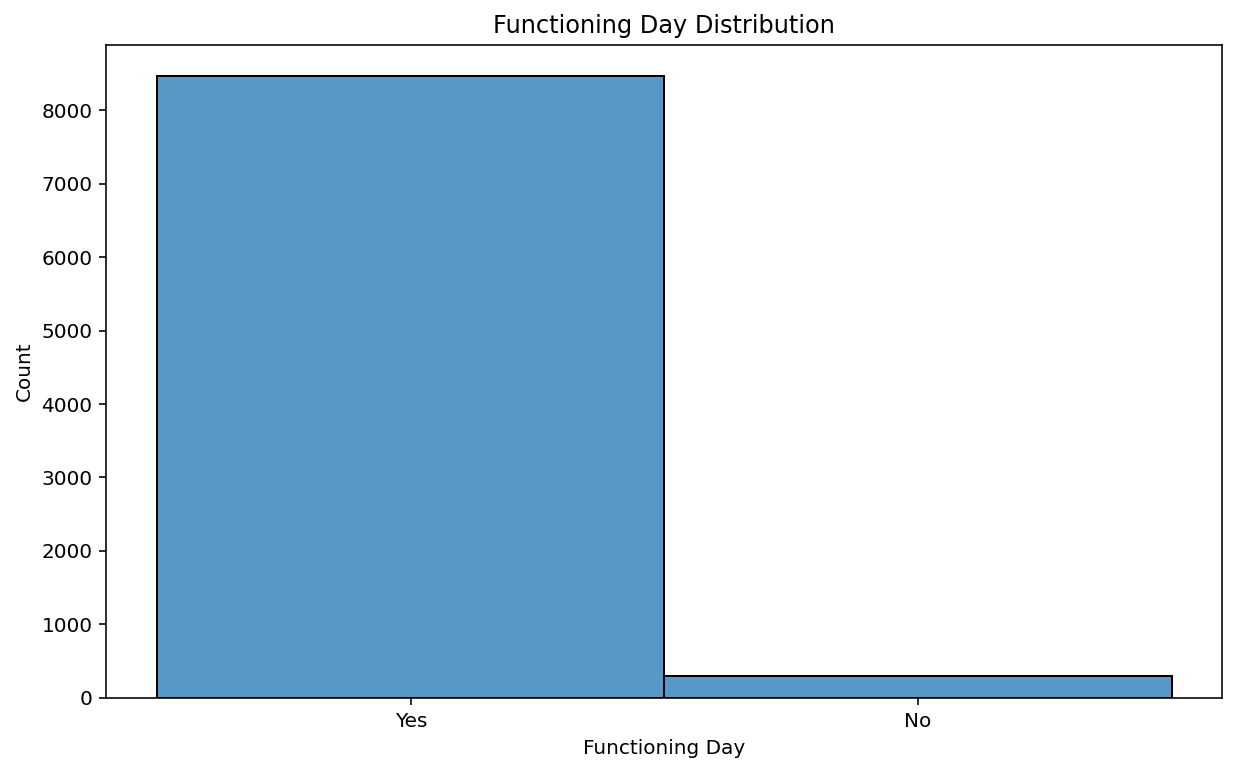

In [45]:
# Holiday의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Functioning Day'])
plt.title('Functioning Day Distribution')

In [46]:
function_rows = df[df['Functioning Day'] == 'No']
function_rows['Date'].drop_duplicates()
#이 날들이 다 무슨 날일까?

3144   2018-04-11
3840   2018-05-10
6984   2018-09-18
7008   2018-09-19
7224   2018-09-28
7272   2018-09-30
7320   2018-10-02
7368   2018-10-04
7416   2018-10-06
7488   2018-10-09
8088   2018-11-03
8160   2018-11-06
8232   2018-11-09
Name: Date, dtype: datetime64[ns]

In [47]:
function_rows.head(50)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rounded Temperature,Rounded Dewpoint,Rounded Wind speed,Rounded Visibility,Rounded Solar Radiation
3144,2018-04-11,0,0,NaN,82,4.6,1041,11.3,0.00,0.0,0.0,Spring,No Holiday,No,NaN,11.0,5.0,1040,0.0
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.00,0.0,0.0,Spring,No Holiday,No,14.0,10.0,4.0,890,0.0
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.00,0.0,0.0,Spring,No Holiday,No,13.0,9.0,4.0,880,0.0
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.00,0.0,0.0,Spring,No Holiday,No,12.0,8.0,3.0,690,0.0
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.00,0.0,0.0,Spring,No Holiday,No,10.0,7.0,4.0,550,0.0
3149,2018-04-11,0,5,9.7,84,1.7,447,7.1,0.00,0.0,0.0,Spring,No Holiday,No,10.0,7.0,2.0,450,0.0
3150,2018-04-11,0,6,9.0,86,2.0,442,6.7,0.00,0.0,0.0,Spring,No Holiday,No,9.0,7.0,2.0,440,0.0
3151,2018-04-11,0,7,8.8,85,1.1,438,6.4,0.11,0.0,0.0,Spring,No Holiday,No,9.0,6.0,1.0,440,0.0
3152,2018-04-11,0,8,9.7,77,1.6,519,5.8,0.68,0.0,0.0,Spring,No Holiday,No,10.0,6.0,2.0,520,1.0
3153,2018-04-11,0,9,11.8,59,2.1,975,4.0,1.44,0.0,0.0,Spring,No Holiday,No,12.0,4.0,2.0,980,1.0


## 결측치

### 결측치 확인

In [48]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature                876
Humidity                     0
Wind speed                 876
Visibility                   0
Dew point temperature        0
Solar Radiation              0
Rainfall                     0
Snowfall                     0
Seasons                    876
Holiday                      0
Functioning Day              0
Rounded Temperature        876
Rounded Dewpoint             0
Rounded Wind speed         876
Rounded Visibility           0
Rounded Solar Radiation      0
dtype: int64

In [80]:
# Missing values exist in Temperature & Wind speed & Seasons 

# Temperature : Seanons 평균값 등으로 대체할 수 있지 않을까? 
# Wind speed : ?
# Seasons : 날짜가 변수에 결측값이 없으니까 seasons 값 대충 알 수 있음

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature              7884 non-null   float64       
 4   Humidity                 8760 non-null   int64         
 5   Wind speed               7884 non-null   float64       
 6   Visibility               8760 non-null   int64         
 7   Dew point temperature    8760 non-null   float64       
 8   Solar Radiation          8760 non-null   float64       
 9   Rainfall                 8760 non-null   float64       
 10  Snowfall                 8760 non-null   float64       
 11  Seasons                  7884 non-null   object        
 12  Holiday                  8760 non-

In [51]:
##msno.matrix(df, figsize=(12,5)) why(?)

<AxesSubplot:>

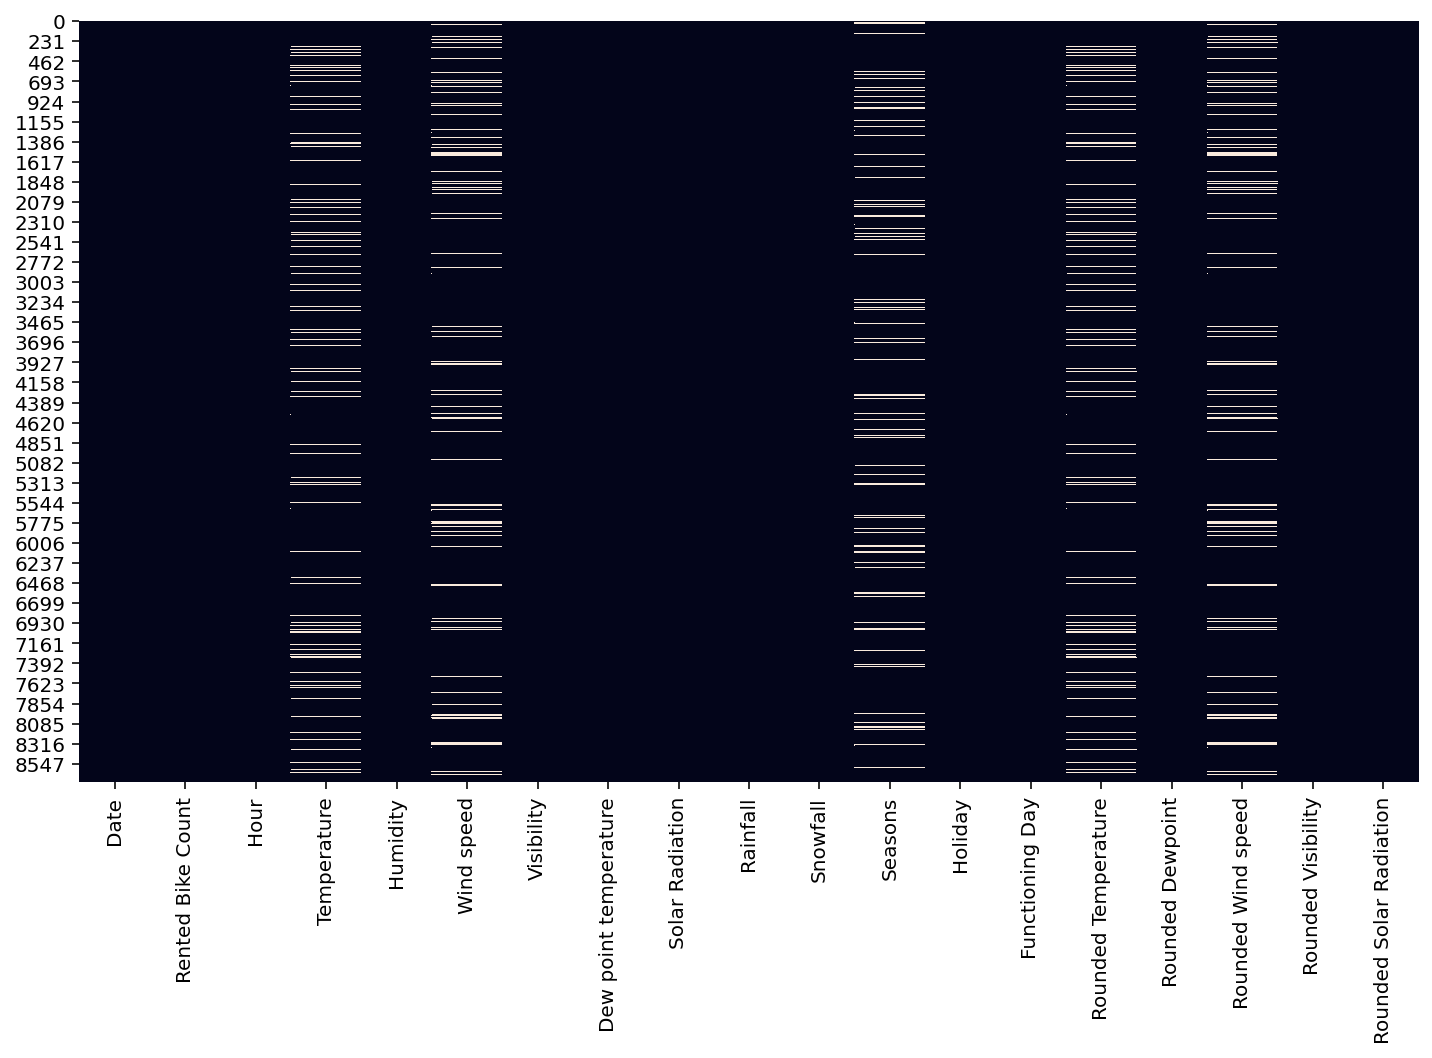

In [52]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cbar = False)

In [53]:
!pip install missingno

In [54]:
#import missingno as msno
#msno.matrix(df)

### 결측치 처리

-  결측치를 처리 해야하는 이유
 
 통계적 관점 : 모수 추정에 있어 오차가 발생, 신뢰구간이 작아지는 문제
 
 모델링적 관점 : 일부 모델은 결측치가 있으면 코드 오류 발생, 모델 예측 정확도 하락의 가능성

 - 결측값 삭제 / 제거

    값 제거 / 열 제거 / 행 제거 (dropna())

    데이터셋에 많은 변수가 있다면 2개 이상의 결측값이 있는 행은 삭제해도 무리가 없을 것
    but 결측값이 1개만 있는 행의 경우 그 행이 데이터를 분석하는 데 결정적인 역할을 하는 행이라면 해당행을 삭제하면 큰 손실이 될 지도 모름 

In [55]:
# df.dropna(thresh = 2)
# 2개 이상의 컬럼에 결측값이 존재하는 데이터 삭제, 상황에 따라 개수 지정 가능

# df.dropna(subset = ['Temperature,'Wind speed'])
# Temperature 나 Wind speed 중 컬럼에 결측값이 하나에라도 있는 행은 삭제

# df.dropna(subset = ['Temperature,'Wind speed'],inplace = True)
# inplace thrtjddmf True로 지정해야 변경된 내용이 원본 데이터에 실제로 적용된다.

* 결측값 대체
    
    단일 대체 / 다중 대체

### Temperature 결측값

In [56]:
df._get_numeric_data().corr().Temperature.sort_values()
#df._get_numeric_data().corr()은 주어진 데이터프레임에서 숫자형 데이터만을 선택하고, 그 데이터의 상관 계수를 계산하는 과정을 수행합니다.

Snowfall                  -0.221321
Wind speed                -0.034464
Rounded Wind speed        -0.033761
Rounded Visibility         0.039508
Visibility                 0.039581
Rainfall                   0.050215
Hour                       0.116151
Humidity                   0.156094
Rounded Solar Radiation    0.344244
Solar Radiation            0.356539
Rented Bike Count          0.537229
Rounded Dewpoint           0.911735
Dew point temperature      0.912099
Rounded Temperature        0.999700
Temperature                1.000000
Name: Temperature, dtype: float64

In [57]:
#Temperature 와 Dew point temperature는 강한 양의 상관관계를 가지고 있다
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Rented Bike Count', 'Dew point temperature', 'Temperature']])
df2.Temperature=pd.DataFrame(imputed_arr, columns=['Rented Bike Count', 'Dew point temperature', 'Temperature']).Temperature.round()

In [58]:
print(f'대체 전: {df.Temperature.isna().sum()}')
print(f'대체 후: {df2.Temperature.isna().sum()}')

대체 전: 876
대체 후: 0


In [59]:
print(f'대체 전: {df.Temperature.std()}')
print(f'대체 후: {df2.Temperature.std()}')

대체 전: 11.93601661646215
대체 후: 11.882032597316558


### Seasons 결측값

In [60]:
df['Month'] = df['Date'].dt.month

# 결과 출력
print(df[['Month', 'Seasons']]) 

      Month Seasons
0        12     NaN
1        12  Winter
2        12  Winter
3        12  Winter
4        12  Winter
...     ...     ...
8755     11     NaN
8756     11  Autumn
8757     11  Autumn
8758     11  Autumn
8759     11  Autumn

[8760 rows x 2 columns]


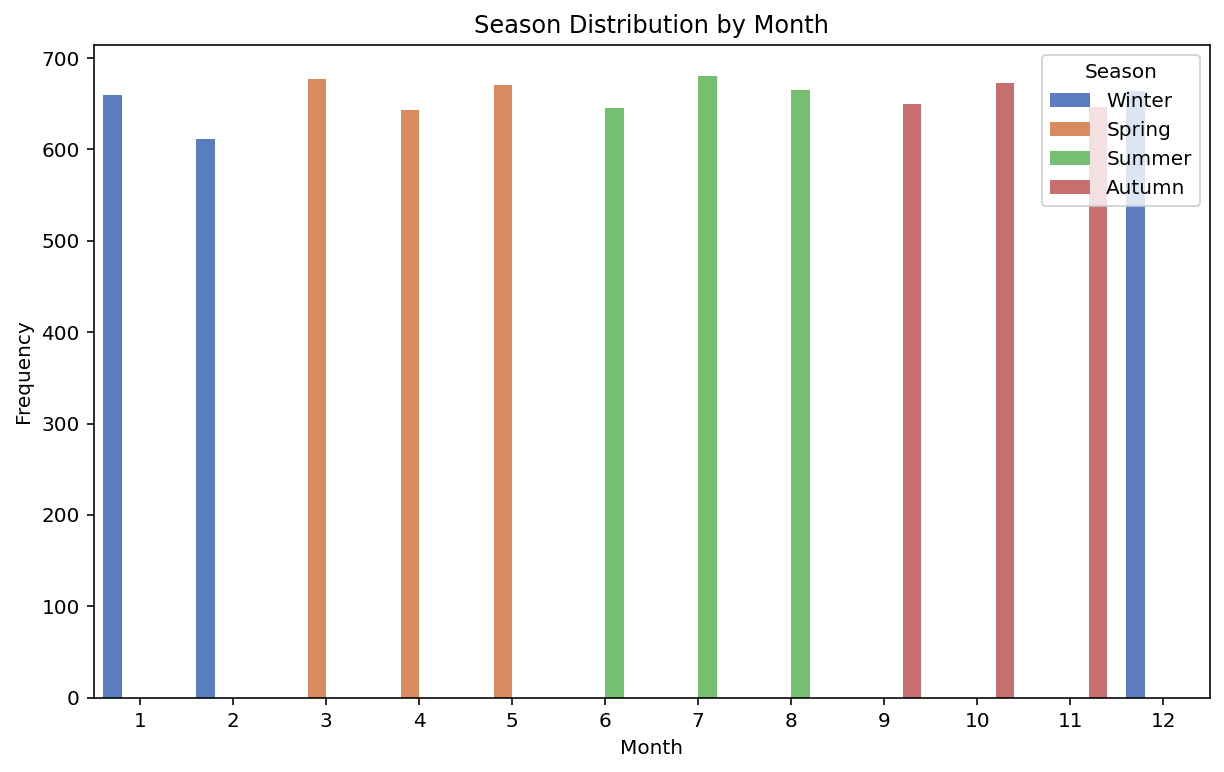

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Seasons', data=df, palette='muted')

plt.title('Season Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Season')

#이 그래프를 봤을 때 3,4,5 월 spring 6,7,8 월 summer 9,10,11 월 Autumn, 12,1,2 월 Winter
#뭔가 더 잘 알아낼 방법이 있을 거 같음

In [62]:
# Seasons 열의 결측값 처리
def fill_missing_season(row):
    month = row['Month']
    if pd.isna(row['Seasons']):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'
    else:
        return row['Seasons']

df2['Seasons'] = df.apply(fill_missing_season, axis=1)

In [63]:
print(f'대체 전: {df.Seasons.isna().sum()}')
print(f'대체 후: {df2.Seasons.isna().sum()}')

대체 전: 876
대체 후: 0


In [64]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             7884 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-6.0,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.0,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Wind speed 결측값

In [65]:
df._get_numeric_data().corr()['Wind speed'].sort_values()
# Wind speed와 상관관계가 있는 변수가 없다
# 일단 평균값으로 대체 근데 Why?
# 계절별 평균값으로 넣는게 더 좋을라나??

Humidity                  -0.336105
Rounded Dewpoint          -0.178202
Dew point temperature     -0.178011
Month                     -0.159328
Rounded Temperature       -0.034586
Temperature               -0.034464
Rainfall                  -0.019080
Snowfall                  -0.001319
Rented Bike Count          0.116558
Rounded Visibility         0.170667
Visibility                 0.170671
Hour                       0.284573
Rounded Solar Radiation    0.323888
Solar Radiation            0.331239
Rounded Wind speed         0.963231
Wind speed                 1.000000
Name: Wind speed, dtype: float64

In [66]:
df['Wind speed'].describe()

count    7884.000000
mean        1.727220
std         1.036138
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: Wind speed, dtype: float64

In [67]:
wind_mean = df.groupby('Seasons')['Wind speed'].mean().sort_values()
wind_mean

Seasons
Autumn    1.497106
Summer    1.631778
Spring    1.852860
Winter    1.918714
Name: Wind speed, dtype: float64

In [75]:
df2['Wind speed']=df2['Wind speed'].fillna(df2['Seasons'].map(wind_mean))

In [76]:
print(f'대체 전: {df["Wind speed"].isna().sum()}')
print(f'대체 후: {df2["Wind speed"].isna().sum()}')

대체 전: 876
대체 후: 0


In [77]:
df2.isna().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

## 이상치

* 이상치 처리 이유

    - 통계적 관점 : 그 값이 확률적으로 나오기 매우 어려울 때
    - 모델링적 관점 : 모델 예측 정확도 하락의 가능성
    - 논리적 관점 : 실제로 나올 수 없는 값이기 때문

* 이상치 판단
    - Z-score : 3 이상 or -3 이하인 경우 이상치로 판단
    - IQR

In [71]:
df2.describe()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,7884.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.934361,58.226256,1.727220,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.882033,20.362413,1.036138,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-18.000000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,4.000000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,14.000000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.000000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.000000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


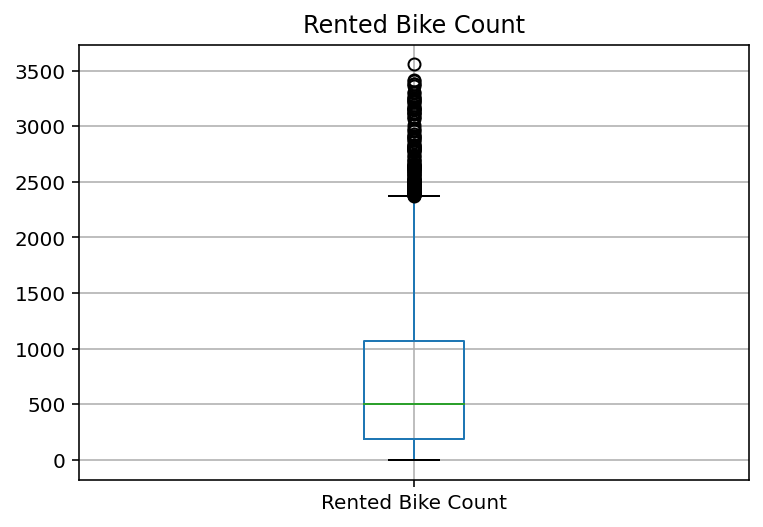

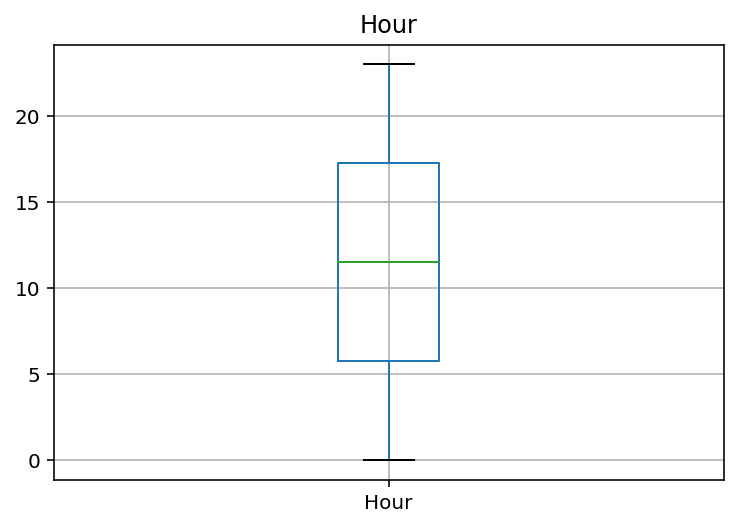

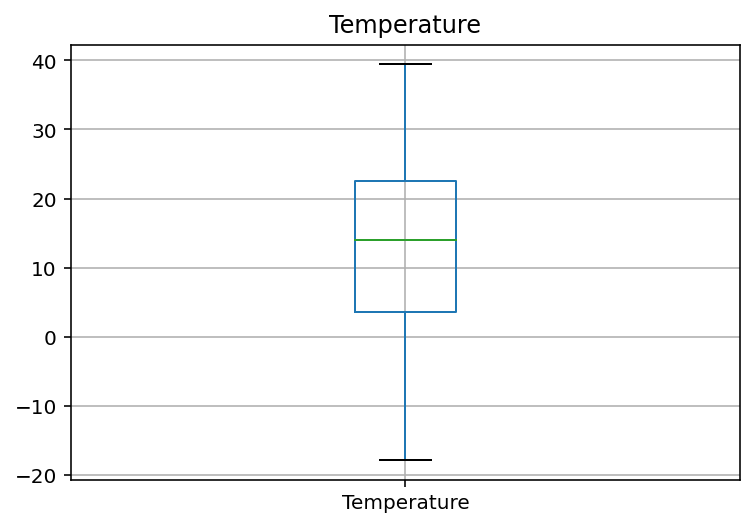

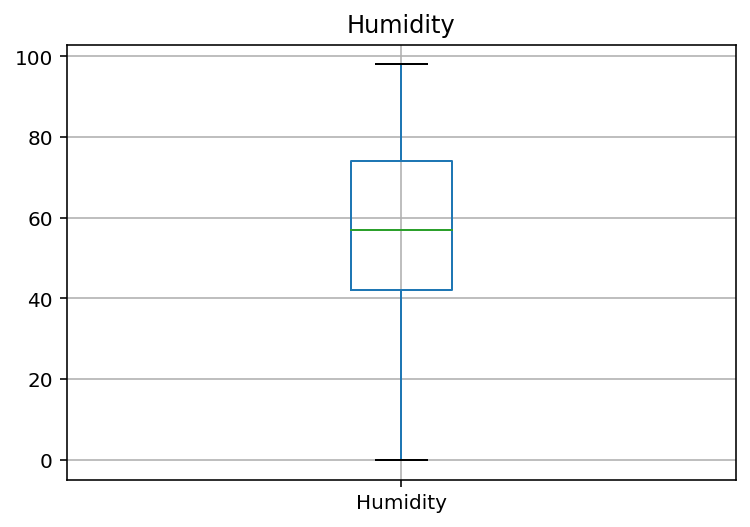

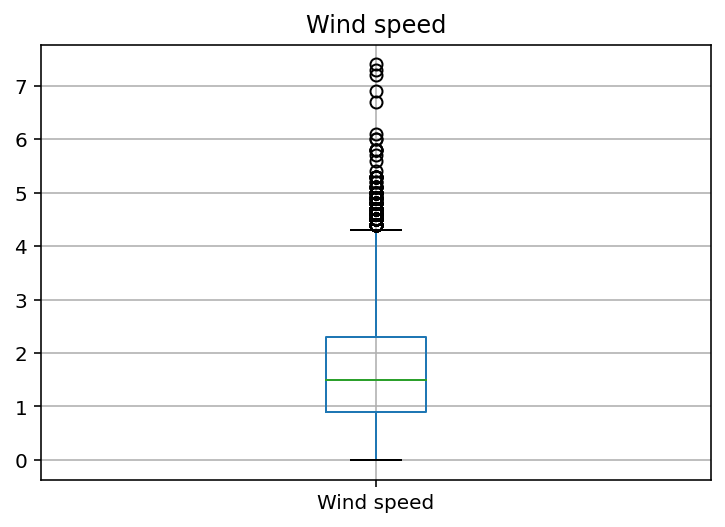

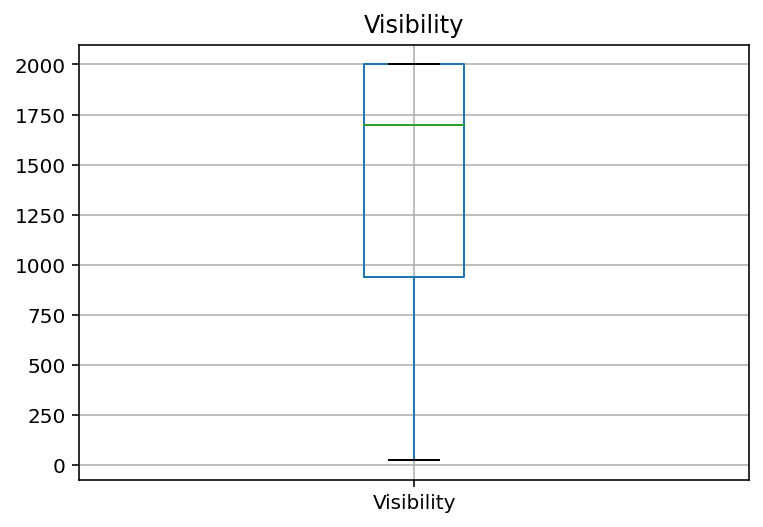

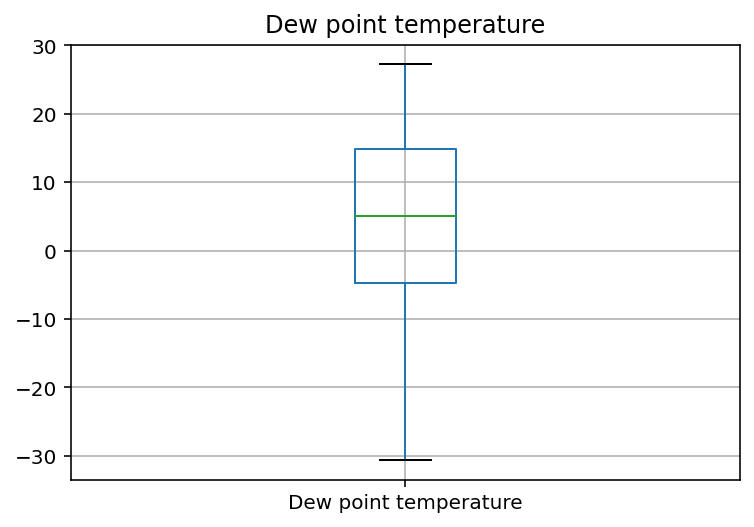

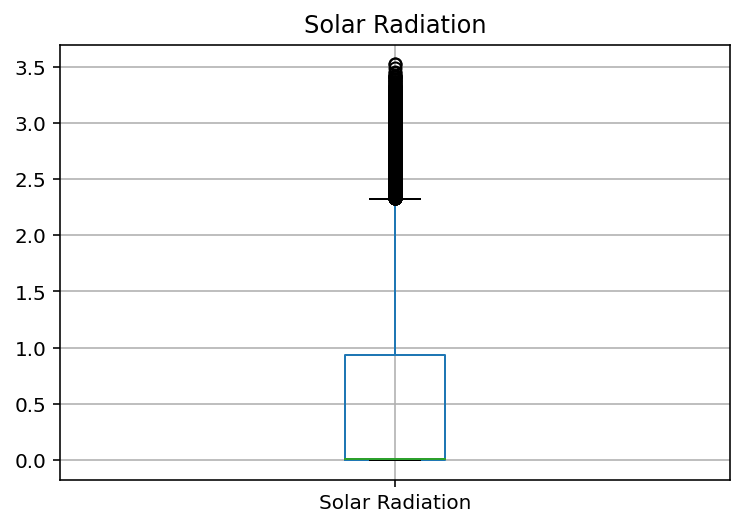

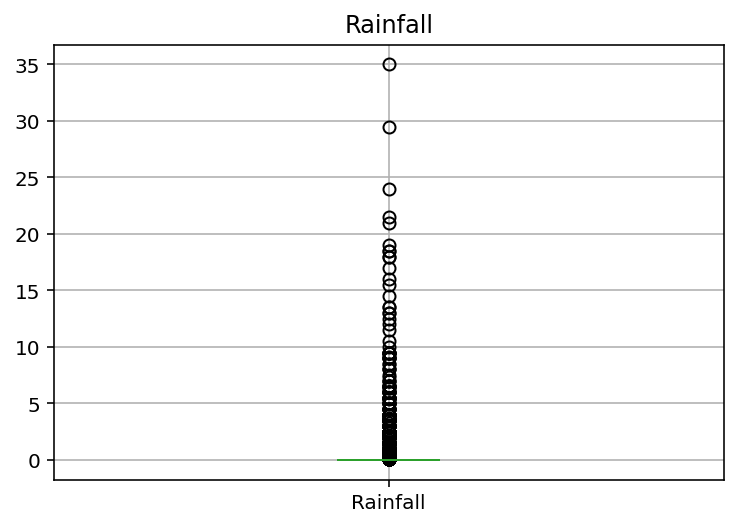

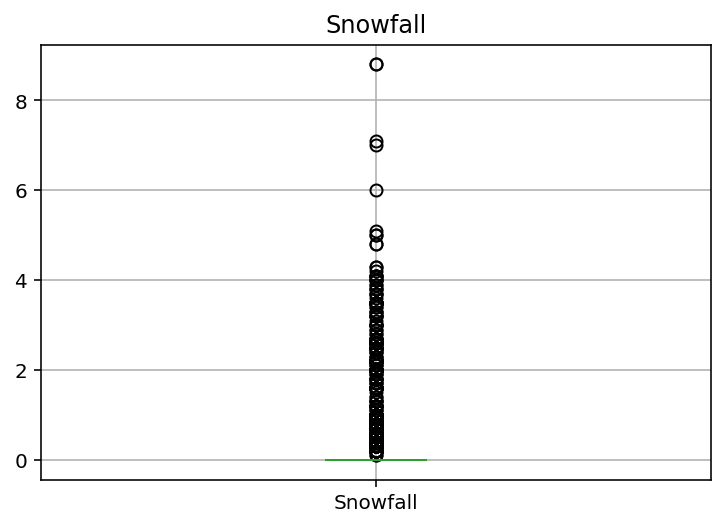

In [82]:
for column in df2.columns:
    if df2[column].dtype in ['int64', 'float64']:  # 수치형 변수만 선택
        df.boxplot(column=column)
        plt.title(column)  # 변수 이름을 그래프 제목으로 설정
        plt.show()  # 각 변수에 대한 박스플롯

## Humidity 이상치

습도 0은 거의 불가능 -> 이상치

Text(0.5, 1.0, 'Humidity Distribution')

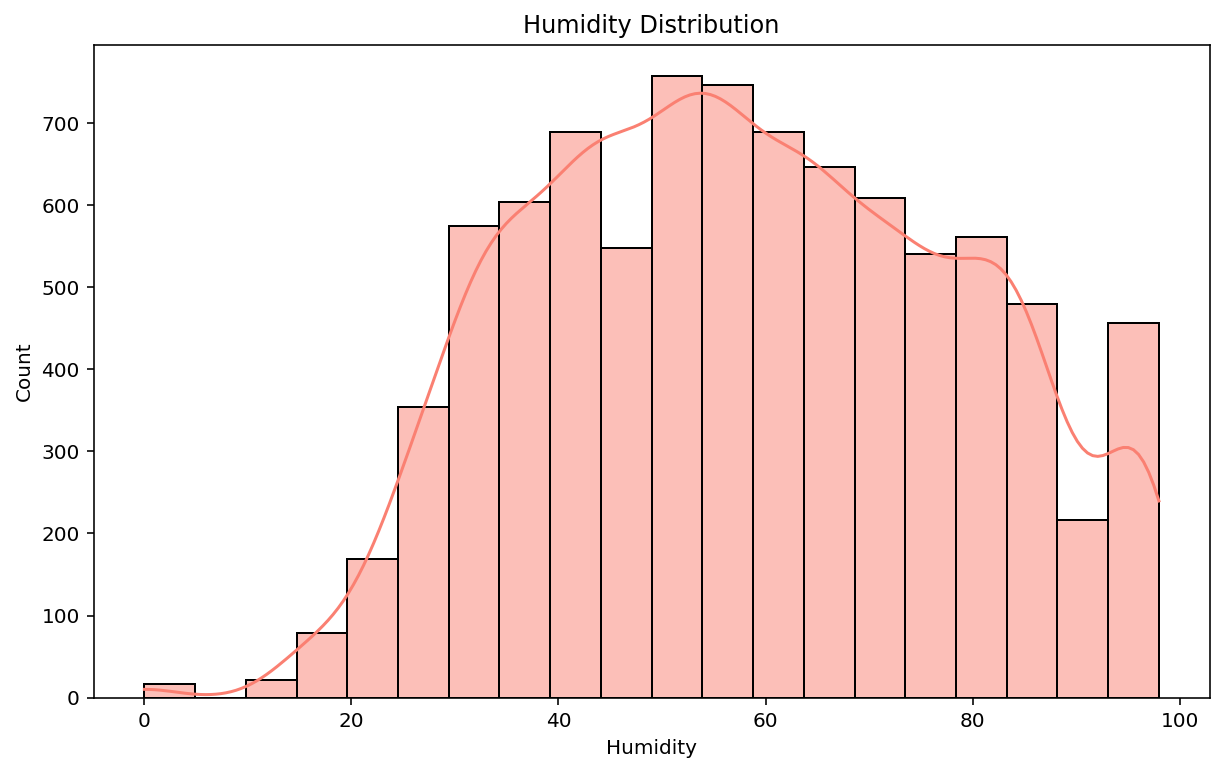

In [81]:
# Humidity의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['Humidity'], bins=20, color='salmon', kde=True)
plt.title('Humidity Distribution')

In [85]:
(df['Humidity'] == 0).sum()

17

In [86]:
hum_mean = df.groupby('Seasons')['Humidity'].mean().sort_values()
hum_mean

Seasons
Winter    49.725065
Spring    58.806030
Autumn    59.195531
Summer    64.990452
Name: Humidity, dtype: float64

In [91]:
# Humidity가 0인 값을 해당 계절의 평균 Humidity 값으로 대체
for season, mean_humidity in hum_mean.items():
    df2.loc[(df2['Humidity'] == 0) & (df2['Seasons'] == season), 'Humidity'] = mean_humidity

In [93]:
(df2['Humidity'] == 0).sum()

0

Text(0.5, 1.0, 'Humidity Distribution')

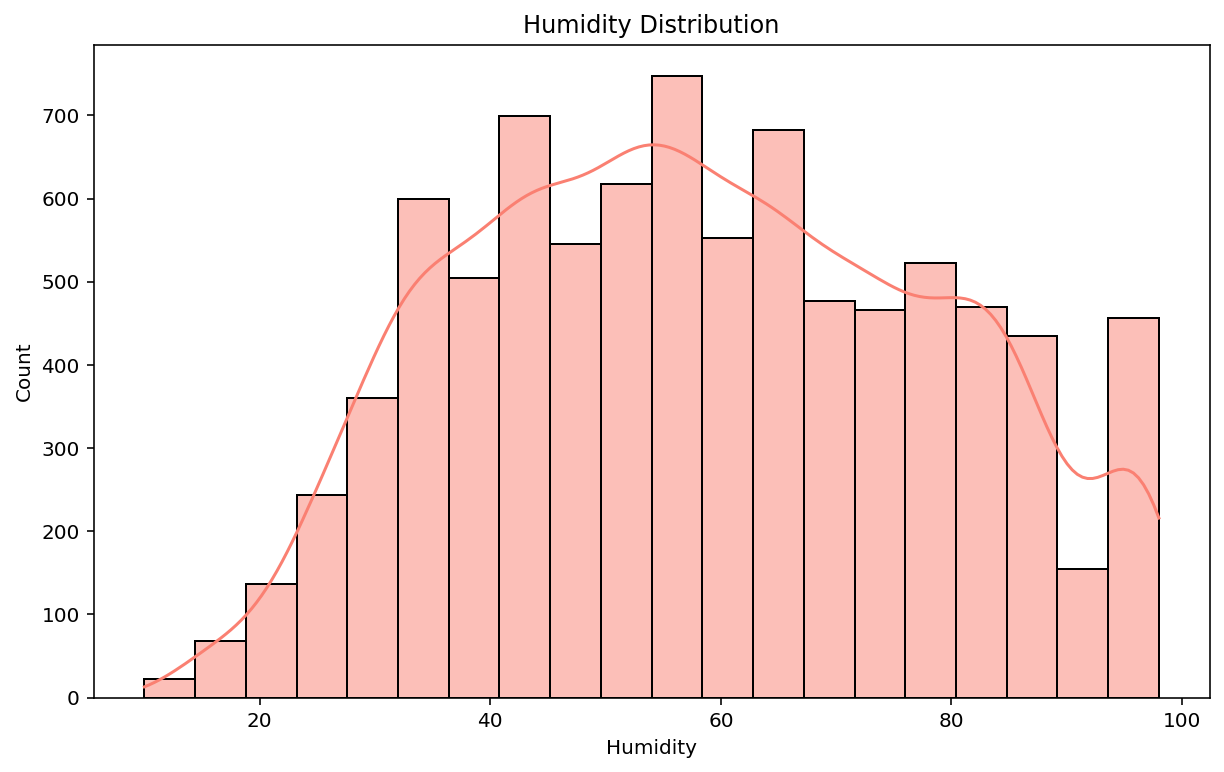

In [94]:
# Humidity의 분포
plt.figure(figsize=(10, 6))
sns.histplot(df2['Humidity'], bins=20, color='salmon', kde=True)
plt.title('Humidity Distribution')

## 변수변환 & 파생변수

어떤걸로 파생변수를 만들어야 할까? -> 날씨를 종합적으로 평가하는 변수를 만들 수도 있지 않을까?

카테고리 변수 변환 꼭 필요한가? 더미 변수가 무조건 필요한가?


In [95]:
# 계절(Seasons) 카테고리 변수 변환
df['Seasons'] = df['Seasons'].astype('category')

# 휴일 여부(Holiday) 카테고리 변수 변환
df['Holiday'] = df['Holiday'].astype('category')

# 기능성 여부(Functional day) 카테고리 변수 변환
df['Functioning Day'] = df['Functioning Day'].astype('category')


In [96]:
df['Seasons']

0          NaN
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755       NaN
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8760, dtype: category
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']

In [97]:
df['Holiday']

0       No Holiday
1       No Holiday
2       No Holiday
3       No Holiday
4       No Holiday
           ...    
8755    No Holiday
8756    No Holiday
8757    No Holiday
8758    No Holiday
8759    No Holiday
Name: Holiday, Length: 8760, dtype: category
Categories (2, object): ['Holiday', 'No Holiday']

In [98]:
# 계절(Seasons) 변수에 대한 원핫인코딩
seasons_dummies = pd.get_dummies(df2['Seasons'], prefix='Season')

# 휴일 여부(Holiday) 변수에 대한 원핫인코딩
holiday_dummies = pd.get_dummies(df2['Holiday'], prefix='Holiday')

# 기능성 여부(Functioning Day) 변수에 대한 원핫인코딩
functioning_dummies = pd.get_dummies(df2['Functioning Day'], prefix='Functioning')

# 기존 DataFrame에 원핫인코딩된 변수들을 추가
df2 = pd.concat([df2, seasons_dummies, holiday_dummies, functioning_dummies], axis=1)


In [99]:
df2

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,...,Holiday,Functioning Day,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_No,Functioning_Yes
0,2017-12-01,254,0,-5.0,37.0,2.200000,2000,-17.6,0.0,0.0,...,No Holiday,Yes,0,0,0,1,0,1,0,1
1,2017-12-01,204,1,-6.0,38.0,0.800000,2000,-17.6,0.0,0.0,...,No Holiday,Yes,0,0,0,1,0,1,0,1
2,2017-12-01,173,2,-6.0,39.0,1.000000,2000,-17.7,0.0,0.0,...,No Holiday,Yes,0,0,0,1,0,1,0,1
3,2017-12-01,107,3,-6.0,40.0,0.900000,2000,-17.6,0.0,0.0,...,No Holiday,Yes,0,0,0,1,0,1,0,1
4,2017-12-01,78,4,-6.0,36.0,1.918714,2000,-18.6,0.0,0.0,...,No Holiday,Yes,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.0,34.0,2.600000,1894,-10.3,0.0,0.0,...,No Holiday,Yes,1,0,0,0,0,1,0,1
8756,2018-11-30,764,20,3.0,37.0,2.300000,2000,-9.9,0.0,0.0,...,No Holiday,Yes,1,0,0,0,0,1,0,1
8757,2018-11-30,694,21,3.0,39.0,0.300000,1968,-9.9,0.0,0.0,...,No Holiday,Yes,1,0,0,0,0,1,0,1
8758,2018-11-30,712,22,2.0,41.0,1.000000,1859,-9.8,0.0,0.0,...,No Holiday,Yes,1,0,0,0,0,1,0,1
